<a href="https://colab.research.google.com/github/bella470/Data-Science_Projects/blob/main/Predicting_and_Classifying_TikTok_Post_Engagement_050824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tiktok Engagement Prediction**


### **1. Bussiness Understanding**

**Problem Statement:**

Determining factors that influence TikTok post engagement is challenging, making it difficult for creators and brands to optimize content for maximum reach and interaction.

**Solution:**

Utilize predictive and classification models to analyze key features of TikTok posts, providing insights into expected engagement rates and engagement levels.

**Main Goal:**

To predict engagement rates and classify engagement levels for TikTok posts.

**Objective:**

To empower content creators and marketers with data-driven insights for optimizing TikTok content strategies.

### **2. Analytic Approach**

Based on the main problem and objective, there is a need to build a predictive model based on using **machine learning (classification and predictive algorithms)**.

### **3. Data Requirements**

Data is from **Bright Data**.

**Hashtags:** Collect a dataset of hashtags.

**Engagement Metrics:** Likes, comments, shares, views.

**Timestamp:** Date and time when the posts were made.

### **4. Data Collection**

Gather information using sample **TikTok post datasets** on hashtags, likes, comments, shares, and other engagement metrics.

Let's explore the Tiktok post datasets.

### **5. Data Understanding**

Examine the dataset to understand the description, hashtags, likes, comments, shares, view and others.

In [3]:
#import related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print ('done')

done


- We use the **chardet library** to **detect the encoding of the file automatically** since we notice some of the data has some weird characters.

In [ ]:
import chardet

# Detect the encoding
with open('/content/TikTokPosts_AllData.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")

# Read the file with the detected encoding
with open('/content/TikTokPosts_AllData.csv', 'r', encoding=encoding, errors='ignore') as file:
    content = file.read()

print(content)

Detected encoding: MacRoman


In [5]:
#load the data
tiktokpost_data = pd.read_csv('/content/TikTokPosts_AllData.csv', encoding='MacRoman')
tiktokpost_data.head()

,url,post_id,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,...,offical_item,secu_id,original_item,shortcode,width,ratio,video_url,music,cdn_url,is_verified
0,https://www.tiktok.com/@a_yo_lando13/video/684...,6.850000e+18,Paco Aguilar El Gallo Negro! #LetsFaceIt #fyp ...,15/07/2020,14400,198.0,639,103,92500,28,...,False,MS4wLjABAAAAoe_shuWhR9nLFG0610NyUapaRfBMue3eRT...,False,6.850000e+18,576,540p,https://v16-webapp-prime.tiktok.com/video/tos/...,"{""authorname"":""Julian"",""covermedium"":""https://...",https://v16-webapp-prime.tiktok.com/video/tos/...,NaN
1,https://www.tiktok.com/@uho.png/video/68593891...,6.860000e+18,#illustration #sketchbook #tiktokartist #paint...,10/08/2020,10000,37.0,1052,53,100000,39,...,False,MS4wLjABAAAA2rHSpJukYqY3r09on6fMGbkkSWB4GhDCYO...,False,6.860000e+18,540,540p,https://v16-webapp-prime.tiktok.com/video/tos/...,"{""authorname"":""90sFlav"",""covermedium"":""https:/...",https://v16-webapp-prime.tiktok.com/video/tos/...,NaN
2,https://www.tiktok.com/@danetheambitious/video...,7.250000e+18,Experimenting üî¨what ya think? #althiphop #r...,03/07/2023,62,NaN,4,0,640,10,...,False,MS4wLjABAAAA_2Qv1cBLFcM0-0IcOs2O8YMoq-afh6wUDX...,False,7.250000e+18,576,540p,https://v16-webapp-prime.tiktok.com/video/tos/...,"{""authorname"":""Dane without any Danish"",""cover...",https://v16-webapp-prime.tiktok.com/video/tos/...,NaN
3,https://www.tiktok.com/@paletteandpens/video/6...,6.830000e+18,rate it from 1 to 10 #satisfying #procreate #d...,21/05/2020,290,4.0,7,6,2520,20,...,False,MS4wLjABAAAAQbW6EDI3GoWWHLV_Roig8hD3HEK-JxyOKz...,False,6.830000e+18,576,540p,https://v16-webapp-prime.tiktok.com/video/tos/...,"{""authorname"":""Palette and pens"",""covermedium""...",https://v16-webapp-prime.tiktok.com/video/tos/...,NaN
4,https://www.tiktok.com/@mehndibymanali/video/7...,7.050000e+18,Beginner henna design #EveryKiss #henna #YerAW...,31/12/2021,1700000,37700.0,149130,5858,21200000,46,...,False,MS4wLjABAAAAzAnKBALhyZGkeVsRjQzg5HwNmTtL2_7AgU...,False,7.050000e+18,576,540p,https://v16-webapp-prime.tiktok.com/video/tos/...,"{""id"":""6882676975199062790"",""original"":false}",https://v16-webapp-prime.tiktok.com/video/tos/...,NaN


In [6]:
#check how many rows and column
print('Tiktok post data shape: ', tiktokpost_data.shape)

Tiktok post data shape:  (10041, 30)


- There are **10041 tiktok post** and **30 columns of features**. We only **select a numbers of columns** that we will use later and **related** to our objective.

### **Description of the data**:

**description**: The caption or description text associated with the TikTok post.

**create_time**: The timestamp indicating when the post was created.

**digg_count**: The number of likes the post has received.

**share_count**: The number of times the post has been shared.

**collect_count**: The number of times the post has been saved or added to favorites.

**comment_count**: The number of comments on the post.

**play_count**: The number of times the video has been viewed.

**video_duration**: The length of the video in seconds.

**hashtags**: A list of hashtags used in the post.

**post_type**: The type of post, such as video, image, etc.

**discovery_input**: Information about how the post was discovered (e.g., search keywords).

**is_verified**: Indicates whether the user profile is verified.

In [7]:
#print all columns name in datasets
tiktokpost_data.columns

Index(['url', 'post_id', 'description', 'create_ time', 'digg_count',
       'share_count', 'collect_count', 'comment_count', 'play_count',
       'video_duration', 'hashtags', 'original_sound', 'profile_id',
       'profile_username', 'profile_url', 'profile_avatar',
       'profile_biography', 'preview_image', 'post_type', 'discovery_input',
       'offical_item', 'secu_id', 'original_item', 'shortcode', 'width',
       'ratio', 'video_url', 'music', 'cdn_url', 'is_verified'],
      dtype='object')

In [8]:
#drop unrelated column
tiktokpost_data.drop(columns = ['url', 'post_id','original_sound', 'profile_id','profile_username', 'profile_url', 'profile_avatar', 'profile_biography', 'preview_image', 'offical_item', 'secu_id', 'original_item', 'shortcode', 'width','ratio', 'video_url', 'music', 'cdn_url'], axis = 1, inplace = True)

In [9]:
#read the related data
tiktokpost_data.head()

,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,hashtags,post_type,discovery_input,is_verified
0,Paco Aguilar El Gallo Negro! #LetsFaceIt #fyp ...,15/07/2020,14400,198.0,639,103,92500,28,"[""letsfaceit"",""fyp"",""foryoupage"",""fy"",""art"",""a...",video,NaN,NaN
1,#illustration #sketchbook #tiktokartist #paint...,10/08/2020,10000,37.0,1052,53,100000,39,"[""illustration"",""sketchbook"",""tiktokartist"",""p...",video,NaN,NaN
2,Experimenting üî¨what ya think? #althiphop #r...,03/07/2023,62,NaN,4,0,640,10,"[""althiphop"",""reggae"",""altrnb"",""musiciansoftik...",video,NaN,NaN
3,rate it from 1 to 10 #satisfying #procreate #d...,21/05/2020,290,4.0,7,6,2520,20,"[""satisfying"",""procreate"",""digital"",""beautiful...",video,NaN,NaN
4,Beginner henna design #EveryKiss #henna #YerAW...,31/12/2021,1700000,37700.0,149130,5858,21200000,46,"[""everykiss"",""henna"",""yerawizard"",""mehndi"",""he...",video,NaN,NaN


In [10]:
#check how many rows and column after drop
print('Tiktok post data shape: ', tiktokpost_data.shape)

Tiktok post data shape:  (10041, 12)


- **Updated:**There are **10041 tiktok post** and **12 columns of features** related to our objective.

In [11]:
#to know more general info of our data
tiktokpost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   description      9888 non-null   object 
 1   create_ time     10041 non-null  object 
 2   digg_count       10041 non-null  int64  
 3   share_count      9229 non-null   float64
 4   collect_count    10041 non-null  int64  
 5   comment_count    10041 non-null  int64  
 6   play_count       10041 non-null  int64  
 7   video_duration   10041 non-null  int64  
 8   hashtags         9966 non-null   object 
 9   post_type        10041 non-null  object 
 10  discovery_input  6328 non-null   object 
 11  is_verified      7433 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 941.5+ KB


In [12]:
#check total of missing value in each column
tiktokpost_data.isnull().sum()

description         153
create_ time          0
digg_count            0
share_count         812
collect_count         0
comment_count         0
play_count            0
video_duration        0
hashtags             75
post_type             0
discovery_input    3713
is_verified        2608
dtype: int64

**Summary:**

There are **5 columns with missing values**, which are:

- **description** (153 missing values)

- **share_count** (812 missing values)

- **hashtags** (75 missing values)

- **discovery_input** (3713 missing valus)

- **is_verified** (2608 missing values)

### **6. Data Preparation**

- Do **data wrangling** and **Explotary Data Analysis (EDA)**

### 1. I notice some non-ASCII characters in the datasets that need to be remove in the description and the hashtag column to avoid confusion. We will use funtion to **remove non-ASCII characters** from the datasets.

In [13]:
# Data Wrangling
# Function to remove non-ASCII characters
def remove_non_ascii(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

# Apply the function to all string columns
tiktokpost_data = tiktokpost_data.applymap(lambda x: remove_non_ascii(x) if isinstance(x, str) else x)

tiktokpost_data.head(10)

,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,hashtags,post_type,discovery_input,is_verified
0,Paco Aguilar El Gallo Negro! #LetsFaceIt #fyp ...,15/07/2020,14400,198.0,639,103,92500,28,"[""letsfaceit"",""fyp"",""foryoupage"",""fy"",""art"",""a...",video,NaN,NaN
1,#illustration #sketchbook #tiktokartist #paint...,10/08/2020,10000,37.0,1052,53,100000,39,"[""illustration"",""sketchbook"",""tiktokartist"",""p...",video,NaN,NaN
2,Experimenting what ya think? #althiphop #regga...,03/07/2023,62,NaN,4,0,640,10,"[""althiphop"",""reggae"",""altrnb"",""musiciansoftik...",video,NaN,NaN
3,rate it from 1 to 10 #satisfying #procreate #d...,21/05/2020,290,4.0,7,6,2520,20,"[""satisfying"",""procreate"",""digital"",""beautiful...",video,NaN,NaN
4,Beginner henna design #EveryKiss #henna #YerAW...,31/12/2021,1700000,37700.0,149130,5858,21200000,46,"[""everykiss"",""henna"",""yerawizard"",""mehndi"",""he...",video,NaN,NaN
5,ich liebe die kleinen kann es kaum erwarten ...,15/07/2024,3,NaN,0,0,592,6,"[""normalseinkannjeder"",""diy"",""art"",""artist"",""a...",video,"{""search_keyword"":""cure""}",False
6,Merida #disney #vlog#disney#fan#art#artist#mer...,03/05/2021,21400,38.0,253,98,154200,25,"[""disney"",""vlog"",""disney"",""fan"",""art"",""artist""...",video,"{""search_keyword"":""merida""}",False
7,"All that glitters is not gold, sometimes its j...",02/01/2024,3382,47.0,1142,25,76500,29,"[""procreatetutorial"",""customtype"",""handletteri...",video,"{""search_keyword"":""procreate""}",False
8,#jly #scotty #theroots #remix #remixchallenge ...,14/07/2024,45,NaN,12,3,1165,98,"[""jly"",""scotty"",""theroots"",""remix"",""remixchall...",video,"{""search_keyword"":""richicoverload""}",False
9,Waves under golden skies My website is linked...,12/07/2024,114,1.0,4,14,583,17,"[""art"",""painting"",""oilpainting"",""fyp"",""fy"",""vi...",video,"{""search_keyword"":""landscape""}",False




### 2. Convert create_time to a standard datetime format **(data formatting)**

In [14]:
#convert create_time to a standard datetime format
tiktokpost_data['create_ time'] = pd.to_datetime(tiktokpost_data['create_ time'])

In [15]:
#data types and basic info
tiktokpost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   description      9888 non-null   object        
 1   create_ time     10041 non-null  datetime64[ns]
 2   digg_count       10041 non-null  int64         
 3   share_count      9229 non-null   float64       
 4   collect_count    10041 non-null  int64         
 5   comment_count    10041 non-null  int64         
 6   play_count       10041 non-null  int64         
 7   video_duration   10041 non-null  int64         
 8   hashtags         9966 non-null   object        
 9   post_type        10041 non-null  object        
 10  discovery_input  6328 non-null   object        
 11  is_verified      7433 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 941.5+ KB


### **3. Handling missing values**

- Missing values for column **discovery_input** and **is_verified** is quite high. So, we can calculate the percentage. If it is over 30%, we can drop the column.

In [16]:
#calculate percentage of missing value for discovery_input

a = tiktokpost_data['discovery_input'].isnull().sum()
b = tiktokpost_data.shape[0]
c = (a/b)*100

print('Percentage of missing values in discovery_input column is: ', c)

Percentage of missing values in discovery_input column is:  36.97838860671248


In [17]:
#calculate percentage of missing value for is_verified

a1 = tiktokpost_data['is_verified'].isnull().sum()
b1 = tiktokpost_data.shape[0]
c1 = (a1/b1)*100

print('Percentage of missing values in is_verified column is: ', c1)

Percentage of missing values in is_verified column is:  25.97350861467981


- Percentage of missing values for **discovery_input** is **36.978%** which is **above 30%**. Hence, we will drop that column.

- Meanwhile column **is_verified** percentage is **not above 30%** so will be replacing them with mode/mean according to the distribution.

In [18]:
#drop discovery_input column
tiktokpost_data.drop(columns = ['discovery_input'], axis = 1, inplace = True)

- Let's **solve the missing value** in **is_verified** column.

In [19]:
#check distribution for is_verified column to determine the missing values
tiktokpost_data['is_verified'].value_counts()

is_verified
False    6975
True      458
Name: count, dtype: int64

- The distribution is not normal, thus we **replace the missing value with the mode**.

In [20]:
#find the mode for is_verified column
mode_vrf = tiktokpost_data['is_verified'].mode()[0]

mode_vrf

False

In [21]:
#replace missing value in is_verified with the mode
tiktokpost_data['is_verified'].replace(np.nan, mode_vrf, inplace = True)

#re-check total missing value
tiktokpost_data.isnull().sum()

description       153
create_ time        0
digg_count          0
share_count       812
collect_count       0
comment_count       0
play_count          0
video_duration      0
hashtags           75
post_type           0
is_verified         0
dtype: int64

- Now, let's **solve the missing value in share_count**.

- We want to **replace the missing value base on play_count(views) range**. It is because it's **not logic if the views is low but have too high shares count**.

- This approach is a form of **group-based imputation**, where missing values are imputed based on aggregated statistics from similar data points.

In [22]:
#display statistical description for all column
tiktokpost_data.describe(include='all')

,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,hashtags,post_type,is_verified
count,9888,10041,1.004100e+04,9229.000000,1.004100e+04,10041.000000,1.004100e+04,10041.000000,9966,10041,10041
unique,7468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6779,3,2
top,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],video,False
freq,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644,9945,9583
mean,NaN,2023-05-26 10:51:57.060053504,2.471155e+05,10064.605591,2.095169e+04,1767.928095,3.072627e+06,37.211533,NaN,NaN,NaN
min,NaN,2018-10-10 00:00:00,0.000000e+00,1.000000,0.000000e+00,0.000000,1.800000e+01,0.000000,NaN,NaN,NaN
25%,NaN,2022-09-19 00:00:00,5.600000e+02,27.000000,3.200000e+01,11.000000,9.937000e+03,12.000000,NaN,NaN,NaN
50%,NaN,2023-10-17 00:00:00,9.593000e+03,394.000000,8.370000e+02,106.000000,1.949000e+05,19.000000,NaN,NaN,NaN
75%,NaN,2024-05-18 00:00:00,1.584000e+05,4344.000000,1.358000e+04,966.000000,2.300000e+06,44.000000,NaN,NaN,NaN
max,NaN,2024-07-22 00:00:00,2.270000e+07,970800.000000,1.556405e+06,365800.000000,2.829000e+08,2701.000000,NaN,NaN,NaN


In [23]:
#Data Binning

# Divide the play_count into some range according to min and max in play_count column
# Define bin edges
bins = [0, 2000, 10000, 100000, 500000, 1000000, 10000000, 300000000] #base on the min and max in the column

# Define bin labels
labels = ['0-2k', '2k-10k', '10k-100k', '100k-500k', '500k-1M', '1M-10M', '10M-300M']

# Create new column for the range of play count
tiktokpost_data['play_count_range'] = pd.cut(tiktokpost_data['play_count'], bins=bins, labels=labels, include_lowest=True)

#check play_count_range column
tiktokpost_data[['play_count', 'play_count_range']].head(10)

,play_count,play_count_range
0,92500,10k-100k
1,100000,10k-100k
2,640,0-2k
3,2520,2k-10k
4,21200000,10M-300M
5,592,0-2k
6,154200,100k-500k
7,76500,10k-100k
8,1165,0-2k
9,583,0-2k


In [24]:
#check the distribution data for play_count range
tiktokpost_data['play_count_range'].value_counts()

play_count_range
1M-10M       2650
10k-100k     1915
0-2k         1448
100k-500k    1384
2k-10k       1069
10M-300M      829
500k-1M       746
Name: count, dtype: int64

- I think the distribution of the data for play_count is normal. Then, we can **use the mean share_count corresponding to the play_ count range to replace the missing value**.

In [25]:
#share_count Column
#Let’s create a function to impute share_count regarding
#the corresponding share_count average per play_count_range

def add_share(cols):
    share_count = cols[0]
    play_count_range = cols[1]
    if pd.isnull(share_count):
        return int(tiktokpost_data[tiktokpost_data["play_count_range"] == play_count_range]["share_count"].mean())
    else:
        return share_count

In [26]:
#apply function to replace the missing value
tiktokpost_data['share_count'] = tiktokpost_data[['share_count','play_count_range']].apply(add_share,axis=1)

# re-check missing values remain
tiktokpost_data.isnull().sum()

description         153
create_ time          0
digg_count            0
share_count           0
collect_count         0
comment_count         0
play_count            0
video_duration        0
hashtags             75
post_type             0
is_verified           0
play_count_range      0
dtype: int64

In [27]:
#read the data again
tiktokpost_data[['play_count', 'play_count_range']].head(10)

,play_count,play_count_range
0,92500,10k-100k
1,100000,10k-100k
2,640,0-2k
3,2520,2k-10k
4,21200000,10M-300M
5,592,0-2k
6,154200,100k-500k
7,76500,10k-100k
8,1165,0-2k
9,583,0-2k


- For the **missing value** in the **description**, we can **fill in with no description**.

In [28]:
#replace missing value in description column with no description
tiktokpost_data['description'] = tiktokpost_data['description'].fillna('no_description')

#checking the updated missing value in each column
tiktokpost_data.isnull().sum()

description          0
create_ time         0
digg_count           0
share_count          0
collect_count        0
comment_count        0
play_count           0
video_duration       0
hashtags            75
post_type            0
is_verified          0
play_count_range     0
dtype: int64

- Next, let's **solve missing value** for **hashtags column**.

- Will **change the [] and "" in the column to NaN** as it's the same as null.

- Will proceed to **remove the null values**

- **Remove extra spaces** or **convert all hashtags to lowercase**.

- If there are **unwanted characters** in the hashtags, remove them.

- If posts have **duplicate hashtags in one post**, it might be useful to **remove them to avoid redundancy**.

In [29]:
#check if there is '[]' in hashtag column as it equivalent to NaN
tiktokpost_data['hashtags'].replace('[]', np.nan, inplace = True)
tiktokpost_data['hashtags'].replace('""', np.nan, inplace = True)

#checking the updated missing value in hashtags column
tiktokpost_data.isnull().sum()

description           0
create_ time          0
digg_count            0
share_count           0
collect_count         0
comment_count         0
play_count            0
video_duration        0
hashtags            719
post_type             0
is_verified           0
play_count_range      0
dtype: int64

In [30]:
# for NaN rows (from empty lists), drop them
tiktokpost_data.dropna(subset=['hashtags'], inplace=True)

#checking the updated missing value in hashtags column
tiktokpost_data.isnull().sum()

description         0
create_ time        0
digg_count          0
share_count         0
collect_count       0
comment_count       0
play_count          0
video_duration      0
hashtags            0
post_type           0
is_verified         0
play_count_range    0
dtype: int64

In [31]:
# Removing double quotes from the 'hashtags' column
tiktokpost_data['hashtags'] = tiktokpost_data['hashtags'].apply(lambda x: x.replace('"', ''))

# Print the cleaned DataFrame
print(tiktokpost_data['hashtags'])

0        [letsfaceit,fyp,foryoupage,fy,art,artchallenge...
1        [illustration,sketchbook,tiktokartist,paint,re...
2        [althiphop,reggae,altrnb,musiciansoftiktok,sma...
3        [satisfying,procreate,digital,beautiful,artist...
4        [everykiss,henna,yerawizard,mehndi,hennavideos...
                               ...                        
10036                                [view,foryourpage,tt]
10037                                 [foryourpage,,trend]
10038           [sunilthakor6709team,foryourpage,gangster]
10039                                  [foryourpage,view,]
10040                                        [foryourpage]
Name: hashtags, Length: 9322, dtype: object


In [32]:
# Function to clean and standardize hashtags
def clean_hashtags(hashtags):
    if isinstance(hashtags, str):
        # Remove extra spaces and convert to lowercase
        cleaned = [tag.strip().lower() for tag in hashtags.split(',')]
        # Rejoin the hashtags into a single string
        return ','.join(cleaned)
    return hashtags

# Apply the function to the hashtags column
tiktokpost_data['hashtags'] = tiktokpost_data['hashtags'].apply(clean_hashtags)

# Check the cleaned hashtags
print(tiktokpost_data['hashtags'])

0        [letsfaceit,fyp,foryoupage,fy,art,artchallenge...
1        [illustration,sketchbook,tiktokartist,paint,re...
2        [althiphop,reggae,altrnb,musiciansoftiktok,sma...
3        [satisfying,procreate,digital,beautiful,artist...
4        [everykiss,henna,yerawizard,mehndi,hennavideos...
                               ...                        
10036                                [view,foryourpage,tt]
10037                                 [foryourpage,,trend]
10038           [sunilthakor6709team,foryourpage,gangster]
10039                                  [foryourpage,view,]
10040                                        [foryourpage]
Name: hashtags, Length: 9322, dtype: object


In [33]:
import re
import ast

def convert_to_list(hashtags_str):
    """Convert a string representation of a list to an actual list."""
    # Remove any extra spaces and ensure correct format
    hashtags_str = re.sub(r'\s+', '', hashtags_str)
    hashtags_str = hashtags_str.strip('[]')  # Remove the surrounding brackets
    # Split the string by commas
    if hashtags_str:
        return [tag for tag in hashtags_str.split(',') if tag]
    return []

# Convert string representations of lists to actual lists
tiktokpost_data['hashtags'] = tiktokpost_data['hashtags'].apply(convert_to_list)

In [34]:
# Check the type of each element
print(tiktokpost_data['hashtags'].apply(type).unique())  # Should print [<class 'list'>]
print(tiktokpost_data['hashtags'].apply(lambda x: [type(i) for i in x]).explode().unique())  # Should print [<class 'str'>]

[<class 'list'>]
[<class 'str'> nan]


In [35]:
print(tiktokpost_data['hashtags'])

0        [letsfaceit, fyp, foryoupage, fy, art, artchal...
1        [illustration, sketchbook, tiktokartist, paint...
2        [althiphop, reggae, altrnb, musiciansoftiktok,...
3        [satisfying, procreate, digital, beautiful, ar...
4        [everykiss, henna, yerawizard, mehndi, hennavi...
                               ...                        
10036                              [view, foryourpage, tt]
10037                                 [foryourpage, trend]
10038         [sunilthakor6709team, foryourpage, gangster]
10039                                  [foryourpage, view]
10040                                        [foryourpage]
Name: hashtags, Length: 9322, dtype: object


In [36]:
tiktokpost_data.isnull().sum()

description         0
create_ time        0
digg_count          0
share_count         0
collect_count       0
comment_count       0
play_count          0
video_duration      0
hashtags            0
post_type           0
is_verified         0
play_count_range    0
dtype: int64

In [37]:
tiktokpost_data.describe(include = 'all')

,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,hashtags,post_type,is_verified,play_count_range
count,9322,9322,9.322000e+03,9322.000000,9.322000e+03,9322.000000,9.322000e+03,9322.00000,9322,9322,9322,9322
unique,7123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6700,3,2,7
top,# # #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],video,False,1M-10M
freq,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,9227,8921,2469
mean,NaN,2023-05-30 00:01:32.683973376,2.383086e+05,8889.113602,2.069483e+04,1726.801008,2.978580e+06,36.52006,NaN,NaN,NaN,NaN
min,NaN,2018-10-10 00:00:00,0.000000e+00,1.000000,0.000000e+00,0.000000,1.800000e+01,0.00000,NaN,NaN,NaN,NaN
25%,NaN,2022-09-26 00:00:00,5.322500e+02,14.000000,3.100000e+01,11.000000,9.582500e+03,12.00000,NaN,NaN,NaN,NaN
50%,NaN,2023-10-18 00:00:00,9.520500e+03,258.000000,8.575000e+02,105.000000,1.952500e+05,19.00000,NaN,NaN,NaN,NaN
75%,NaN,2024-05-17 00:00:00,1.590250e+05,3519.000000,1.378500e+04,976.500000,2.300000e+06,44.00000,NaN,NaN,NaN,NaN
max,NaN,2024-07-22 00:00:00,2.270000e+07,970800.000000,1.556405e+06,365800.000000,1.260000e+08,637.00000,NaN,NaN,NaN,NaN


In [38]:
# Count the number of rows where 'hashtags' column contains an empty list
empty_list_count = tiktokpost_data['hashtags'].apply(lambda x: len(x) == 0).sum()

empty_list_count

106

In [39]:
tiktokpost_data.shape

(9322, 12)

In [40]:
# Drop rows where 'hashtags' column contains an empty list
tiktokpost_data_cleaned = tiktokpost_data[tiktokpost_data['hashtags'].apply(lambda x: len(x) > 0)]

# Print the cleaned DataFrame
print(tiktokpost_data_cleaned)

                                             description create_ time  \
0      Paco Aguilar El Gallo Negro! #LetsFaceIt #fyp ...   2020-07-15   
1      #illustration #sketchbook #tiktokartist #paint...   2020-08-10   
2      Experimenting what ya think? #althiphop #regga...   2023-07-03   
3      rate it from 1 to 10 #satisfying #procreate #d...   2020-05-21   
4      Beginner henna design #EveryKiss #henna #YerAW...   2021-12-31   
...                                                  ...          ...   
10036  #view #foryourpage #tt @futen252 @thua68323 @u...   2022-06-12   
10037  #foryourpage # #trend @user965731490485729 @us...   2022-05-26   
10038  mare baunsar dekhe nge#sunilthakor6709team @kr...   2020-05-22   
10039  #foryourpage #view # @thatpnigkgmaly @user9657...   2022-05-09   
10040                   @kabiyaa kalikotay #foryourpage    2023-12-17   

       digg_count  share_count  collect_count  comment_count  play_count  \
0           14400        198.0            639  

In [41]:
tiktokpost_data_cleaned.shape

(9216, 12)

In [42]:
# Check the type of each element
print(tiktokpost_data_cleaned['hashtags'].apply(type).unique())  # Should print [<class 'list'>]
print(tiktokpost_data_cleaned['hashtags'].apply(lambda x: [type(i) for i in x]).explode().unique())  # Should print [<class 'str'>]

[<class 'list'>]
[<class 'str'>]


**Calculate Engagement Rates**

- Engagement Rate includes metrics like likes, comments, shares, saved post. The engagement rate is calculated as the ratio of total engagements to the total number of views or impressions.

In [43]:
# Calculate total engagements
tiktokpost_data_cleaned['total_engagements'] = tiktokpost_data_cleaned['digg_count'] + tiktokpost_data_cleaned['share_count'] + tiktokpost_data_cleaned['collect_count'] + tiktokpost_data_cleaned['comment_count']

# Calculate engagement rate per hashtag
tiktokpost_data_cleaned['engagement_rate'] = tiktokpost_data_cleaned['total_engagements'] / tiktokpost_data_cleaned['play_count']

### **4. Detect and handling outliers**

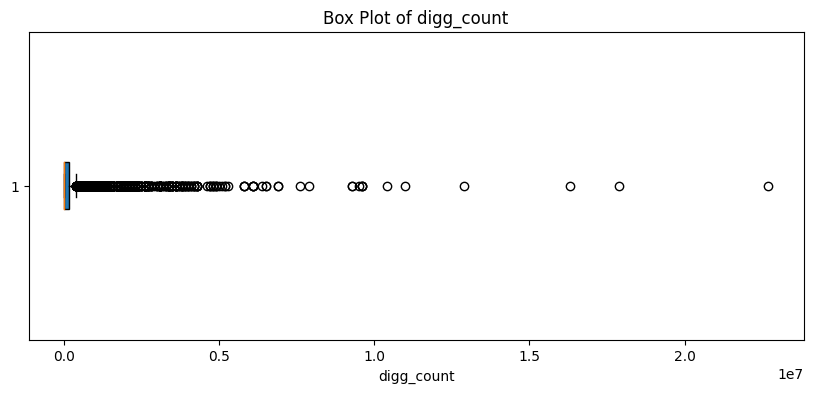

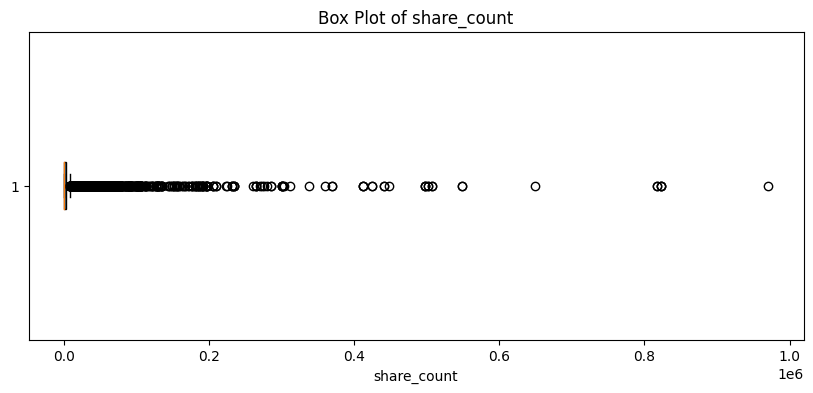

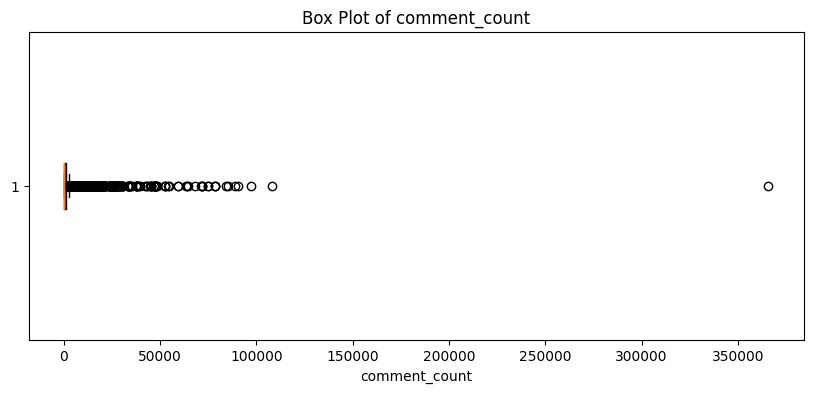

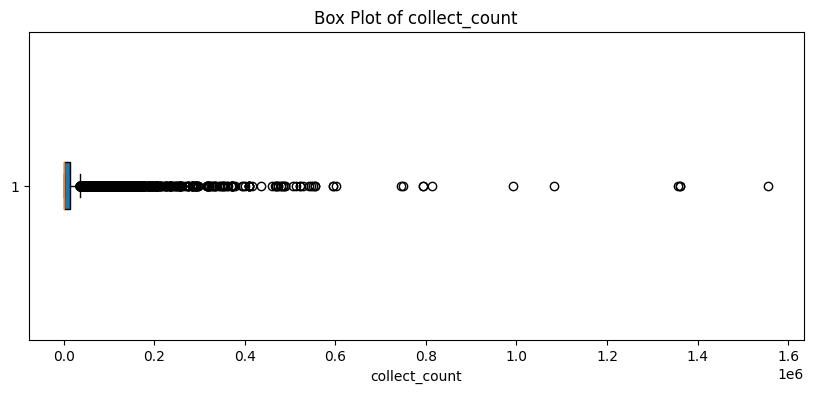

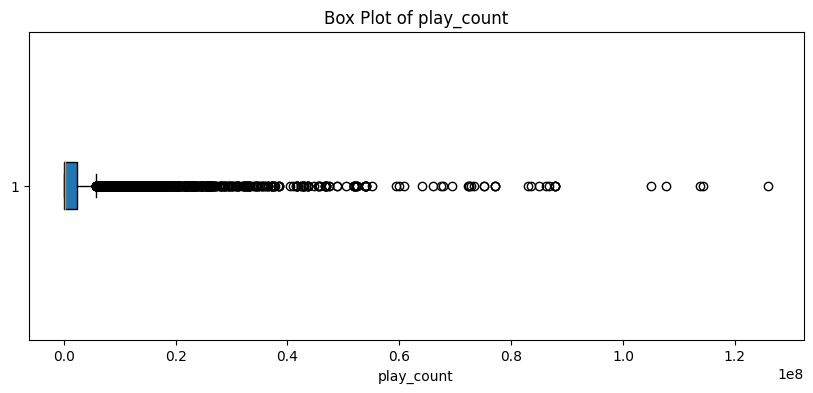

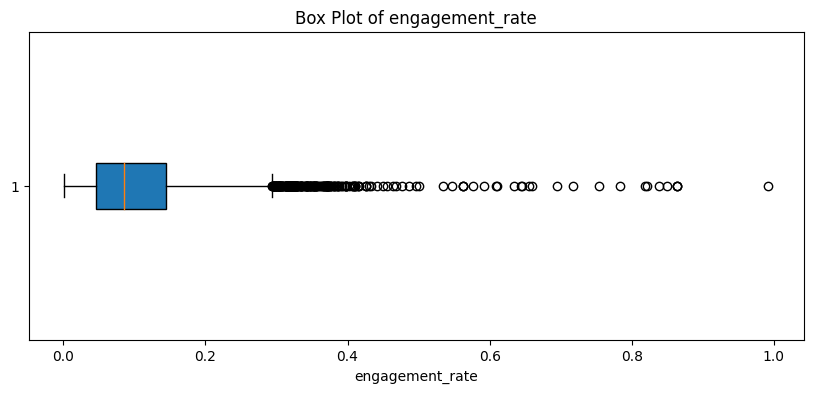

In [44]:
import matplotlib.pyplot as plt

# Visualizing digg_count distribution
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['digg_count'], vert=False, patch_artist=True)
plt.title('Box Plot of digg_count')
plt.xlabel('digg_count')
plt.show()

# Visualizing share_count distribution
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['share_count'], vert=False, patch_artist=True)
plt.title('Box Plot of share_count')
plt.xlabel('share_count')
plt.show()

# Visualizing comment_count distribution
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['comment_count'], vert=False, patch_artist=True)
plt.title('Box Plot of comment_count')
plt.xlabel('comment_count')
plt.show()

# Visualizing collect_count distribution
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['collect_count'], vert=False, patch_artist=True)
plt.title('Box Plot of collect_count')
plt.xlabel('collect_count')
plt.show()

# Visualizing play_count distribution
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['play_count'], vert=False, patch_artist=True)
plt.title('Box Plot of play_count')
plt.xlabel('play_count')
plt.show()

# Visualizing engagement_rate distribution
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['engagement_rate'], vert=False, patch_artist=True)
plt.title('Box Plot of engagement_rate')
plt.xlabel('engagement_rate')
plt.show()

In [45]:
# Calculating IQR for digg_count
Q1_digg = tiktokpost_data_cleaned['digg_count'].quantile(0.25)
Q3_digg = tiktokpost_data_cleaned['digg_count'].quantile(0.75)
IQR_digg = Q3_digg - Q1_digg
lower_bound_digg = Q1_digg - 1.5 * IQR_digg
upper_bound_digg = Q3_digg + 1.5 * IQR_digg

# Detecting outliers in digg_count
outliers_digg_count = tiktokpost_data_cleaned[(tiktokpost_data_cleaned['digg_count'] < lower_bound_digg) | (tiktokpost_data_cleaned['digg_count'] > upper_bound_digg)]

print("Outliers in digg_count:\n", outliers_digg_count)

# Calculating IQR for share_count
Q1_share = tiktokpost_data_cleaned['share_count'].quantile(0.25)
Q3_share = tiktokpost_data_cleaned['share_count'].quantile(0.75)
IQR_share = Q3_share - Q1_share
lower_bound_share = Q1_share - 1.5 * IQR_share
upper_bound_share = Q3_share + 1.5 * IQR_share

# Detecting outliers in share_count
outliers_share_count = tiktokpost_data_cleaned[(tiktokpost_data_cleaned['share_count'] < lower_bound_share) | (tiktokpost_data_cleaned['share_count'] > upper_bound_share)]

print("Outliers in share_count:\n", outliers_share_count)

# Calculating IQR for comment_count
Q1_comment = tiktokpost_data_cleaned['comment_count'].quantile(0.25)
Q3_comment = tiktokpost_data_cleaned['comment_count'].quantile(0.75)
IQR_comment = Q3_comment - Q1_comment
lower_bound_comment = Q1_comment - 1.5 * IQR_comment
upper_bound_comment = Q3_comment + 1.5 * IQR_comment

# Detecting outliers in digg_count
outliers_comment_count = tiktokpost_data_cleaned[(tiktokpost_data_cleaned['comment_count'] < lower_bound_comment) | (tiktokpost_data_cleaned['comment_count'] > upper_bound_comment)]

print("Outliers in digg_count:\n", outliers_comment_count)

# Calculating IQR for collect_count
Q1_collect = tiktokpost_data_cleaned['collect_count'].quantile(0.25)
Q3_collect = tiktokpost_data_cleaned['collect_count'].quantile(0.75)
IQR_collect = Q3_collect - Q1_collect
lower_bound_collect = Q1_collect - 1.5 * IQR_collect
upper_bound_collect = Q3_collect + 1.5 * IQR_collect

# Detecting outliers in share_count
outliers_collect_count = tiktokpost_data_cleaned[(tiktokpost_data_cleaned['collect_count'] < lower_bound_collect) | (tiktokpost_data_cleaned['collect_count'] > upper_bound_collect)]

print("Outliers in share_count:\n", outliers_collect_count)

# Calculating IQR for play_count
Q1_play = tiktokpost_data_cleaned['play_count'].quantile(0.25)
Q3_play = tiktokpost_data_cleaned['play_count'].quantile(0.75)
IQR_play = Q3_play - Q1_play
lower_bound_play = Q1_play - 1.5 * IQR_play
upper_bound_play = Q3_play + 1.5 * IQR_play

# Detecting outliers in play_count
outliers_play_count = tiktokpost_data_cleaned[(tiktokpost_data_cleaned['play_count'] < lower_bound_play) | (tiktokpost_data_cleaned['play_count'] > upper_bound_play)]

print("Outliers in play_count:\n", outliers_play_count)

# Calculating IQR for engagement_rate
Q1_engagement = tiktokpost_data_cleaned['engagement_rate'].quantile(0.25)
Q3_engagement = tiktokpost_data_cleaned['engagement_rate'].quantile(0.75)
IQR_engagement = Q3_engagement - Q1_engagement
lower_bound_engagement = Q1_engagement - 1.5 * IQR_engagement
upper_bound_engagement = Q3_engagement + 1.5 * IQR_engagement

# Detecting outliers in engagement_rate
outliers_engagement_rate = tiktokpost_data_cleaned[(tiktokpost_data_cleaned['engagement_rate'] < lower_bound_engagement) | (tiktokpost_data_cleaned['engagement_rate'] > upper_bound_engagement)]

print("Outliers in engagement_rate:\n", outliers_engagement_rate)

Outliers in digg_count:
                                             description create_ time  \
4     Beginner henna design #EveryKiss #henna #YerAW...   2021-12-31   
21    Simple things to draw when youre bored part 16...   2023-04-26   
85    What do you see guys?How is it possible? #kuns...   2021-06-03   
110   Slow motion bb cut!  TRAINED PROFESSIONAL  #tr...   2023-03-29   
115   Would you get detention Tag a friend who would...   2022-08-21   
...                                                 ...          ...   
9886  Tadow #gojousatoru #gojo #gojoedit #jujutsukai...   2024-03-07   
9893  Our latest 1.61 London mega mansion is coming ...   2022-08-30   
9913  my childhood favourite cartoon,i love it smm #...   2023-09-07   
9958  Blue   #cold #fire #jurassic #jurassicworlddom...   2023-07-10   
9988  ASMR Long ~ Buldak Ssam Jjajang Ssam  King Men...   2023-12-26   

      digg_count  share_count  collect_count  comment_count  play_count  \
4        1700000      37700.0      

In [46]:
# Capping outliers in digg_count
tiktokpost_data_cleaned['digg_count'] = np.where(tiktokpost_data_cleaned['digg_count'] > upper_bound_digg, upper_bound_digg,
                            np.where(tiktokpost_data_cleaned['digg_count'] < lower_bound_digg, lower_bound_digg, tiktokpost_data_cleaned['digg_count']))

# Capping outliers in comment_count
tiktokpost_data_cleaned['comment_count'] = np.where(tiktokpost_data_cleaned['comment_count'] > upper_bound_comment, upper_bound_comment,
                            np.where(tiktokpost_data_cleaned['comment_count'] < lower_bound_comment, lower_bound_comment, tiktokpost_data_cleaned['comment_count']))

# Capping outliers in play_count
tiktokpost_data_cleaned['play_count'] = np.where(tiktokpost_data_cleaned['play_count'] > upper_bound_play, upper_bound_play,
                            np.where(tiktokpost_data_cleaned['play_count'] < lower_bound_play, lower_bound_play, tiktokpost_data_cleaned['play_count']))

# Capping outliers in engagement_rate
tiktokpost_data_cleaned['engagement_rate'] = np.where(tiktokpost_data_cleaned['engagement_rate'] > upper_bound_engagement, upper_bound_engagement,
                                 np.where(tiktokpost_data_cleaned['engagement_rate'] < lower_bound_engagement, lower_bound_engagement, tiktokpost_data_cleaned['engagement_rate']))

# Check some statistics after capping
print(tiktokpost_data_cleaned[['digg_count', 'share_count', 'comment_count', 'collect_count','play_count', 'engagement_rate']].describe())

          digg_count    share_count  comment_count  collect_count  \
count    9216.000000    9216.000000    9216.000000   9.216000e+03   
mean   102227.977105    8943.870877     641.292860   2.087258e+04   
std    149101.765806   39173.425709     908.769397   6.346645e+04   
min         0.000000       1.000000       0.000000   0.000000e+00   
25%       522.000000      14.000000      11.000000   3.100000e+01   
50%      9454.000000     265.500000     106.000000   8.750000e+02   
75%    161800.000000    3559.500000     993.500000   1.399700e+04   
max    403717.000000  970800.000000    2467.250000   1.556405e+06   

         play_count  engagement_rate  
count  9.216000e+03      9216.000000  
mean   1.452867e+06         0.102846  
std    2.079997e+06         0.071945  
min    1.800000e+01         0.000732  
25%    9.399000e+03         0.045997  
50%    1.948500e+05         0.085978  
75%    2.300000e+06         0.145065  
max    5.735902e+06         0.293667  


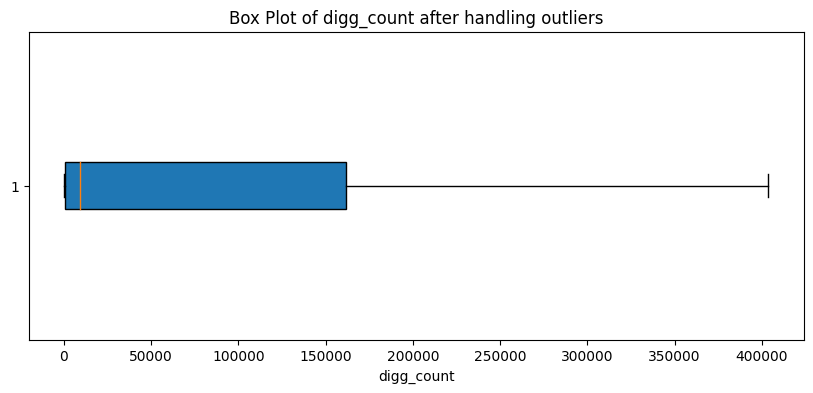

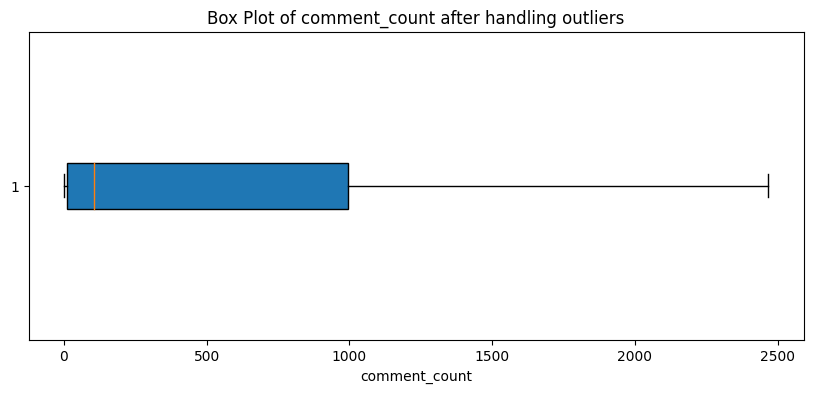

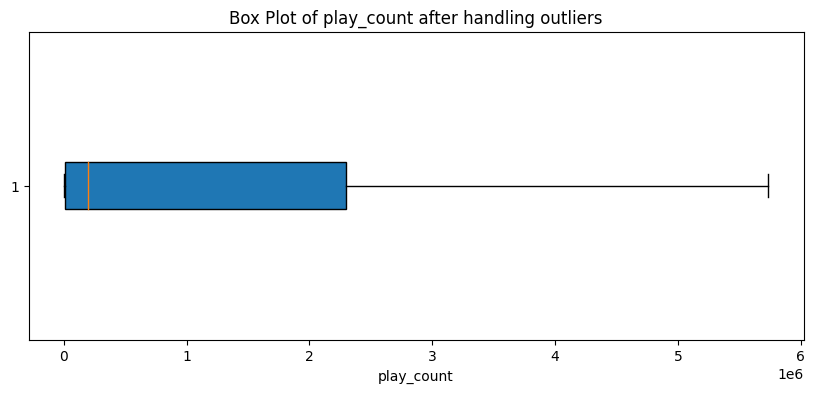

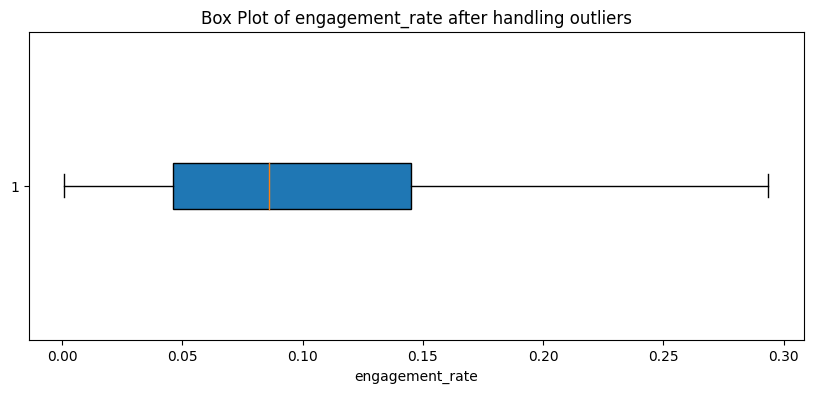

In [47]:
# Visualizing digg_count distribution after handling outliers
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['digg_count'], vert=False, patch_artist=True)
plt.title('Box Plot of digg_count after handling outliers')
plt.xlabel('digg_count')
plt.show()

# Visualizing comment_count distribution after handling outliers
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['comment_count'], vert=False, patch_artist=True)
plt.title('Box Plot of comment_count after handling outliers')
plt.xlabel('comment_count')
plt.show()

# Visualizing play_count distribution after handling outliers
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['play_count'], vert=False, patch_artist=True)
plt.title('Box Plot of play_count after handling outliers')
plt.xlabel('play_count')
plt.show()

# Visualizing engagement_rate distribution after handling outliers
plt.figure(figsize=(10, 4))
plt.boxplot(tiktokpost_data_cleaned['engagement_rate'], vert=False, patch_artist=True)
plt.title('Box Plot of engagement_rate after handling outliers')
plt.xlabel('engagement_rate')
plt.show()

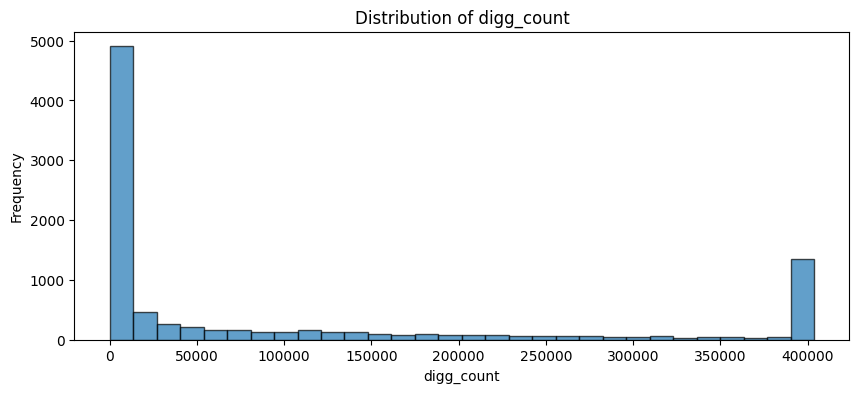

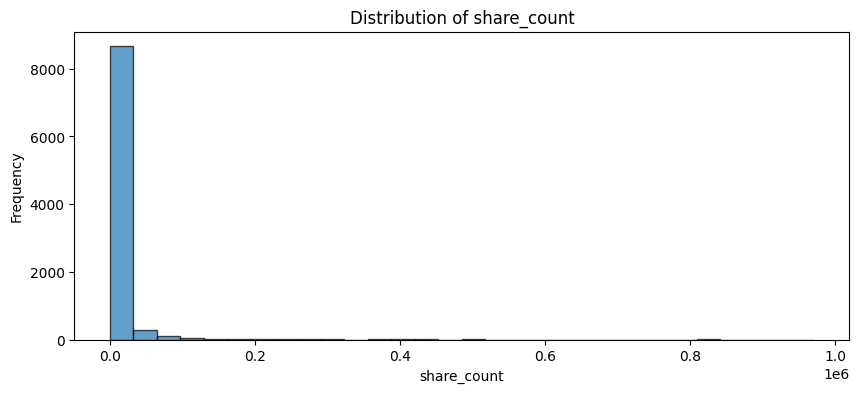

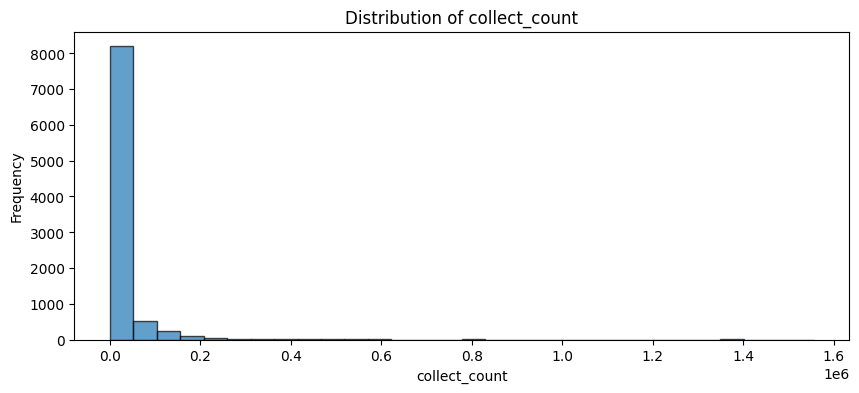

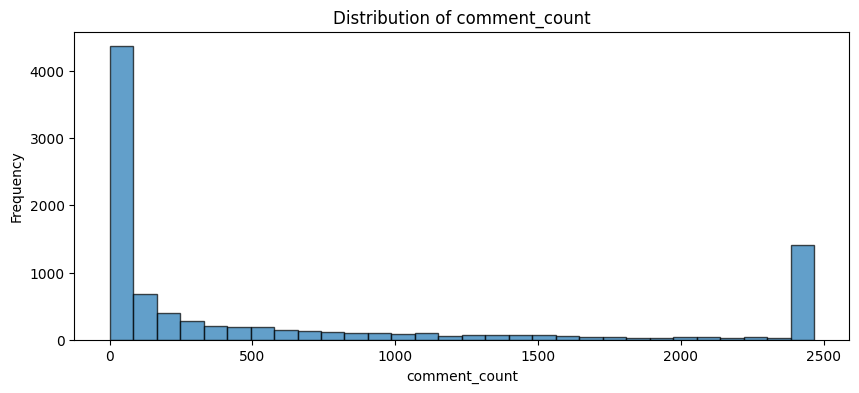

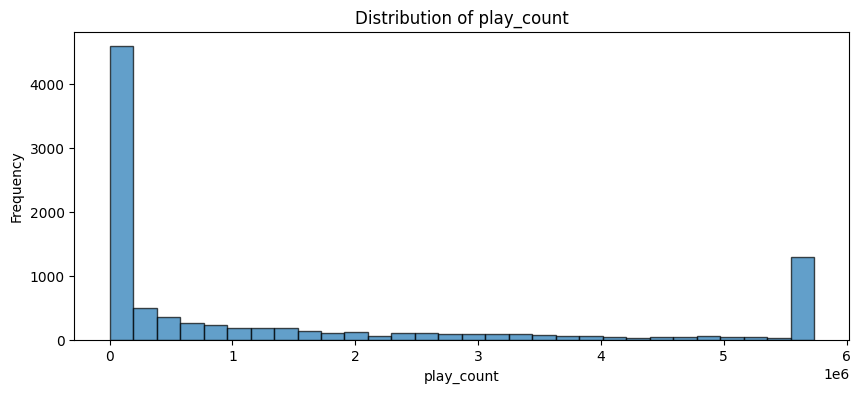

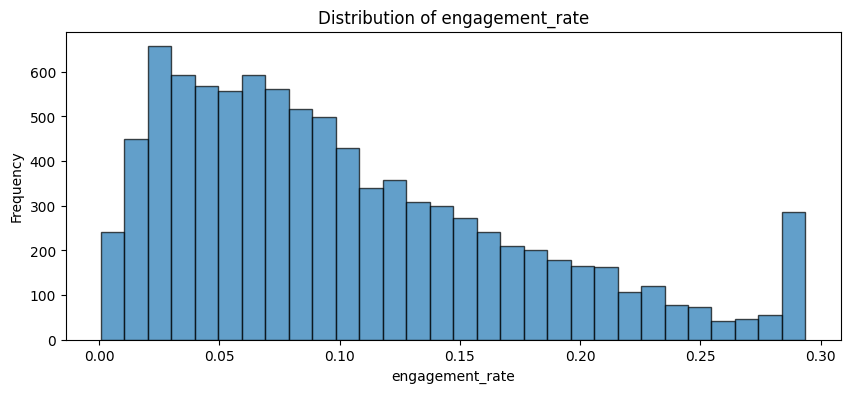

In [48]:
import matplotlib.pyplot as plt

# Plotting distributions
engagement_metrics = ['digg_count', 'share_count', 'collect_count', 'comment_count', 'play_count', 'engagement_rate']

for metric in engagement_metrics:
    plt.figure(figsize=(10, 4))
    plt.hist(tiktokpost_data_cleaned[metric], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

### From this part, we will continue to do **EDA**

In [49]:
# Initialize the Standard Scaler
scaler = StandardScaler()

#select Only Numeric Columns
numeric_data = tiktokpost_data_cleaned[['digg_count', 'share_count', 'collect_count', 'comment_count', 'play_count', 'video_duration']]

# Normalize numeric data
numeric_data_normalized = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

#find correlation between numeric column
correlation_matrix = numeric_data_normalized.corr()

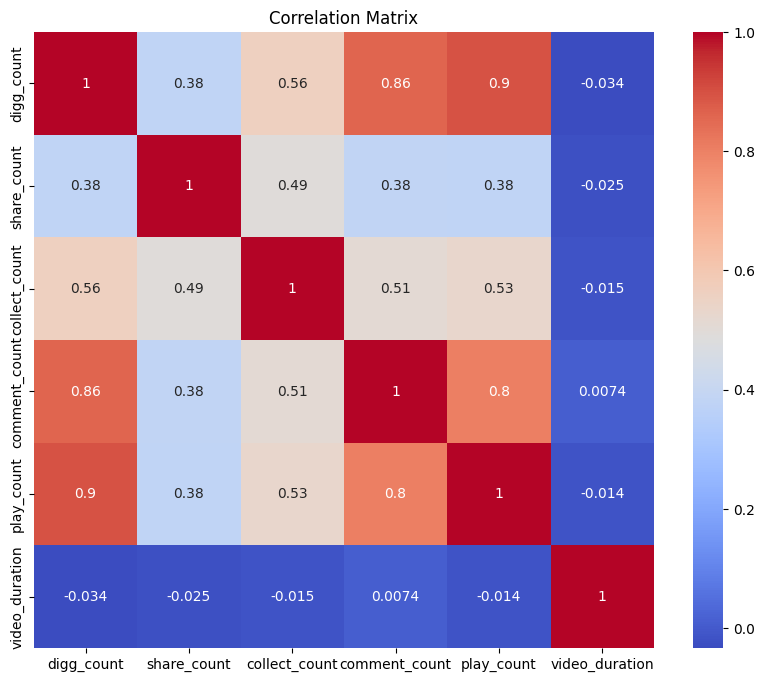

In [50]:
#visualization of correlation between numeric column
figsize = (10, 8)
plt.figure(figsize=figsize)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

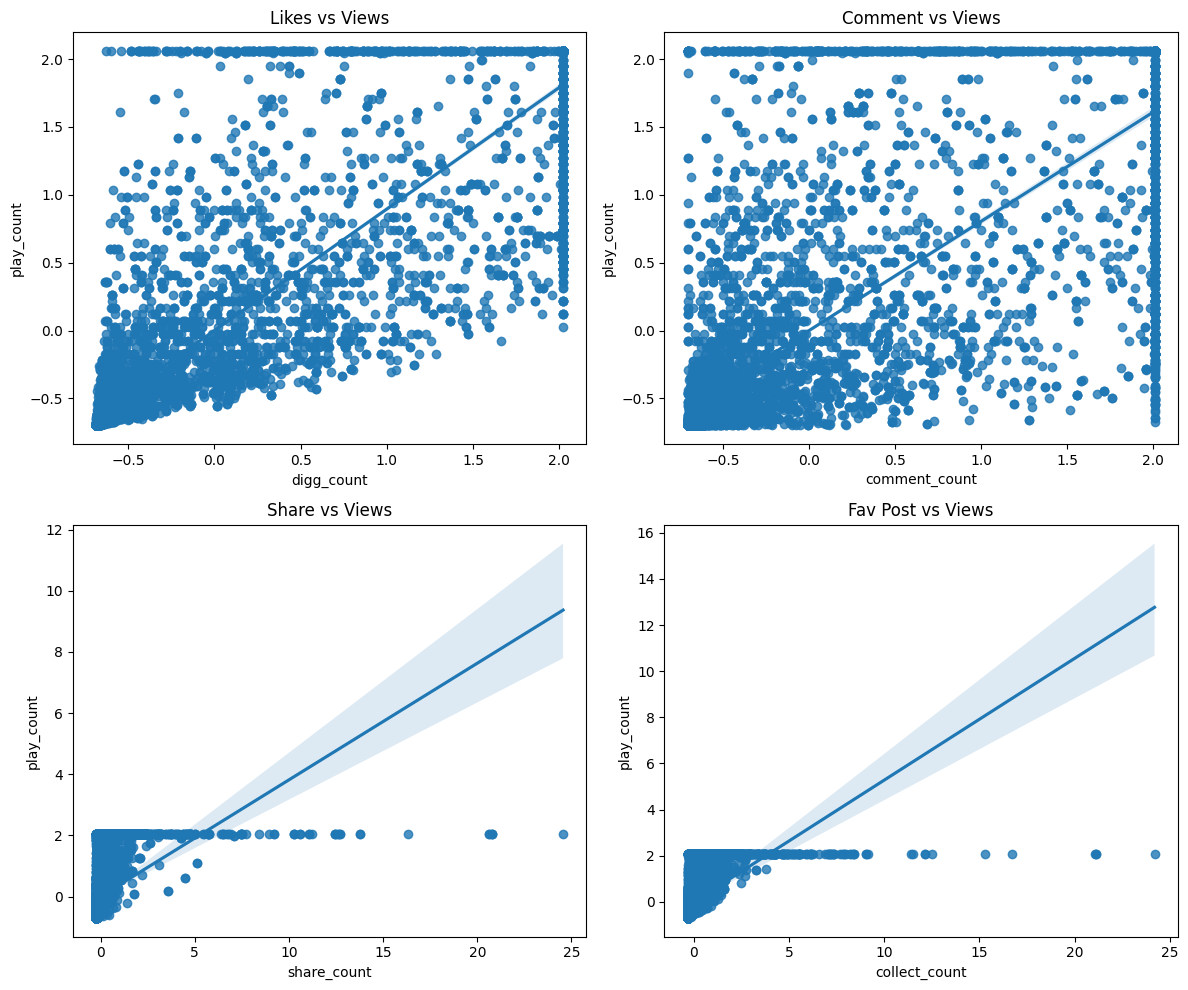

In [51]:
# Setting up the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1
sns.regplot(x="digg_count", y="play_count", data=numeric_data_normalized, ax=axs[0, 0])
axs[0, 0].set_title('Likes vs Views')

# Plot 2
sns.regplot(x="comment_count", y="play_count", data=numeric_data_normalized, ax=axs[0, 1])
axs[0, 1].set_title('Comment vs Views')

# Plot 3
sns.regplot(x="share_count", y="play_count", data=numeric_data_normalized, ax=axs[1, 0])
axs[1, 0].set_title('Share vs Views')

# Plot 4 (optional, you can adjust or add more plots as needed)
sns.regplot(x="collect_count", y="play_count", data=numeric_data_normalized, ax=axs[1, 1])
axs[1, 1].set_title('Fav Post vs Views')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [52]:
#visualize correlation statistic
import scipy.stats as st

#correlation with positive value
correlation, p_value = st.pearsonr(numeric_data_normalized['digg_count'], numeric_data_normalized['play_count'])
correlation1, p_value1 = st.pearsonr(numeric_data_normalized['comment_count'], numeric_data_normalized['play_count'])
correlation2, p_value2 = st.pearsonr(numeric_data_normalized['share_count'], numeric_data_normalized['play_count'])
correlation3, p_value3 = st.pearsonr(numeric_data_normalized['collect_count'], numeric_data_normalized['play_count'])
print('The correlation between likes and view is: ', correlation, 'and the p_value is: ', p_value)
print('The correlation between comment and view is: ', correlation1, 'and the p_value is: ', p_value1)
print('The correlation between share and view is: ', correlation2, 'and the p_value is: ', p_value2)
print('The correlation between fav post and view is: ', correlation3, 'and the p_value is: ', p_value3)

The correlation between likes and view is:  0.8954123298470602 and the p_value is:  0.0
The correlation between comment and view is:  0.8040059283209919 and the p_value is:  0.0
The correlation between share and view is:  0.3814289222787939 and the p_value is:  5.801649e-317
The correlation between fav post and view is:  0.5276776154938901 and the p_value is:  0.0


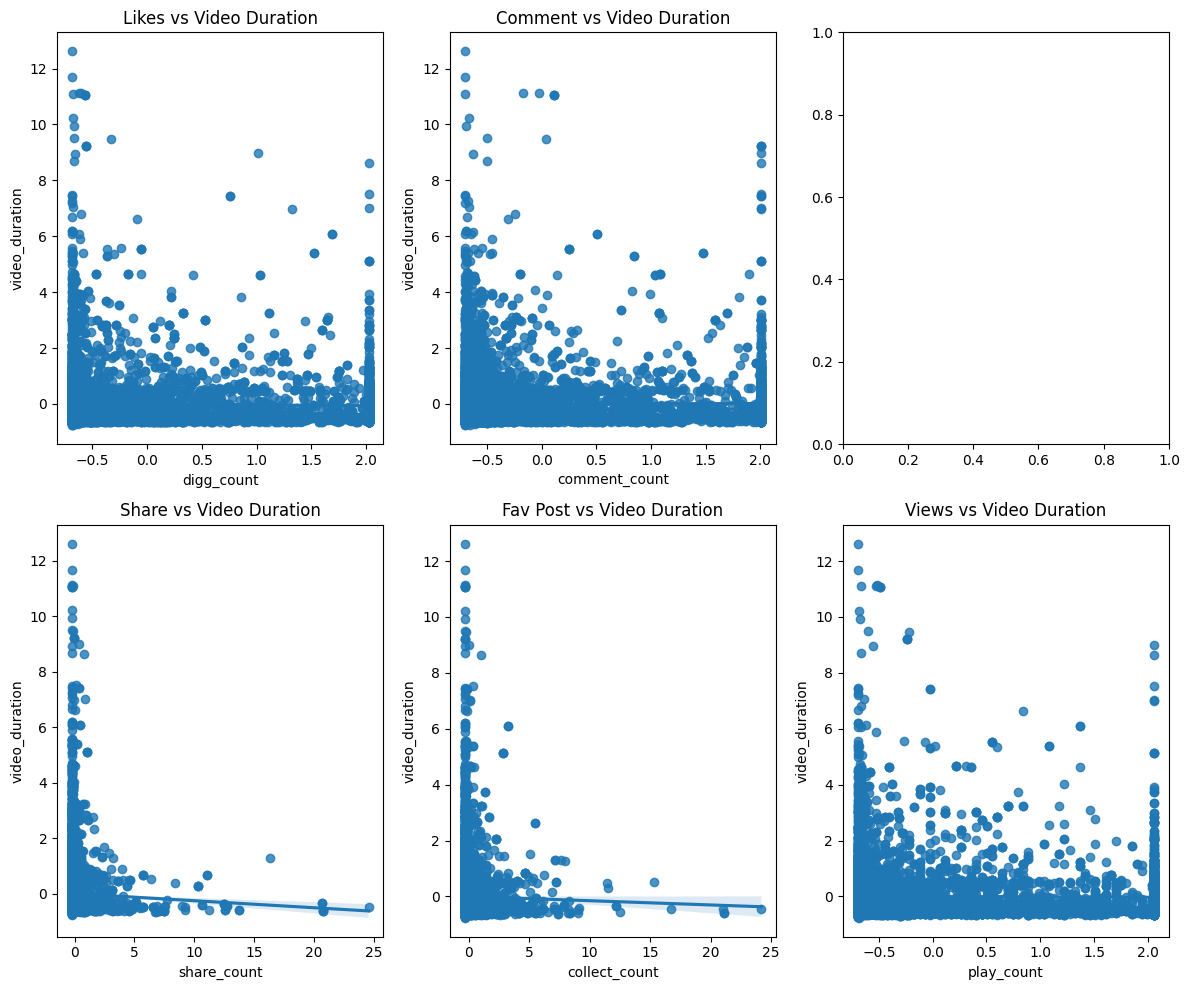

In [53]:
# Setting up the figure and axes for subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# Plot 1
sns.regplot(x="digg_count", y="video_duration", data=numeric_data_normalized, ax=axs[0, 0])
axs[0, 0].set_title('Likes vs Video Duration')

# Plot 2
sns.regplot(x="comment_count", y="video_duration", data=numeric_data_normalized, ax=axs[0, 1])
axs[0, 1].set_title('Comment vs Video Duration')

# Plot 3
sns.regplot(x="share_count", y="video_duration", data=numeric_data_normalized, ax=axs[1, 0])
axs[1, 0].set_title('Share vs Video Duration')

# Plot 4
sns.regplot(x="collect_count", y="video_duration", data=numeric_data_normalized, ax=axs[1, 1])
axs[1, 1].set_title('Fav Post vs Video Duration')

# Plot 5
sns.regplot(x="play_count", y="video_duration", data=numeric_data_normalized, ax=axs[1, 2])
axs[1, 2].set_title('Views vs Video Duration')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [54]:
#correlation with positive value
correlation4, p_value4 = st.pearsonr(numeric_data_normalized['digg_count'], numeric_data_normalized['video_duration'])
correlation5, p_value5 = st.pearsonr(numeric_data_normalized['comment_count'], numeric_data_normalized['video_duration'])
correlation6, p_value6 = st.pearsonr(numeric_data_normalized['share_count'], numeric_data_normalized['video_duration'])
correlation7, p_value7 = st.pearsonr(numeric_data_normalized['collect_count'], numeric_data_normalized['video_duration'])
correlation8, p_value8 = st.pearsonr(numeric_data_normalized['play_count'], numeric_data_normalized['video_duration'])
print('The correlation between likes and video duration is: ', correlation4, 'and the p_value is: ', p_value4)
print('The correlation between comment and video duration is: ', correlation5, 'and the p_value is: ', p_value5)
print('The correlation between share and video duration is: ', correlation6, 'and the p_value is: ', p_value6)
print('The correlation between fav post and video duration is: ', correlation7, 'and the p_value is: ', p_value7)
print('The correlation between views and video duration is: ', correlation8, 'and the p_value is: ', p_value8)

The correlation between likes and video duration is:  -0.033822192920165334 and the p_value is:  0.0011645675313748957
The correlation between comment and video duration is:  0.00736535549294388 and the p_value is:  0.47957405518638196
The correlation between share and video duration is:  -0.025338625698085315 and the p_value is:  0.014992149270526436
The correlation between fav post and video duration is:  -0.015190674758116434 and the p_value is:  0.1447878769841408
The correlation between views and video duration is:  -0.014079173822872597 and the p_value is:  0.17654033577733938


**Conclusion from heatmap**: All numeric column except video_duration has positive correlation. Video_ duration has weak correlation with all numeric features.

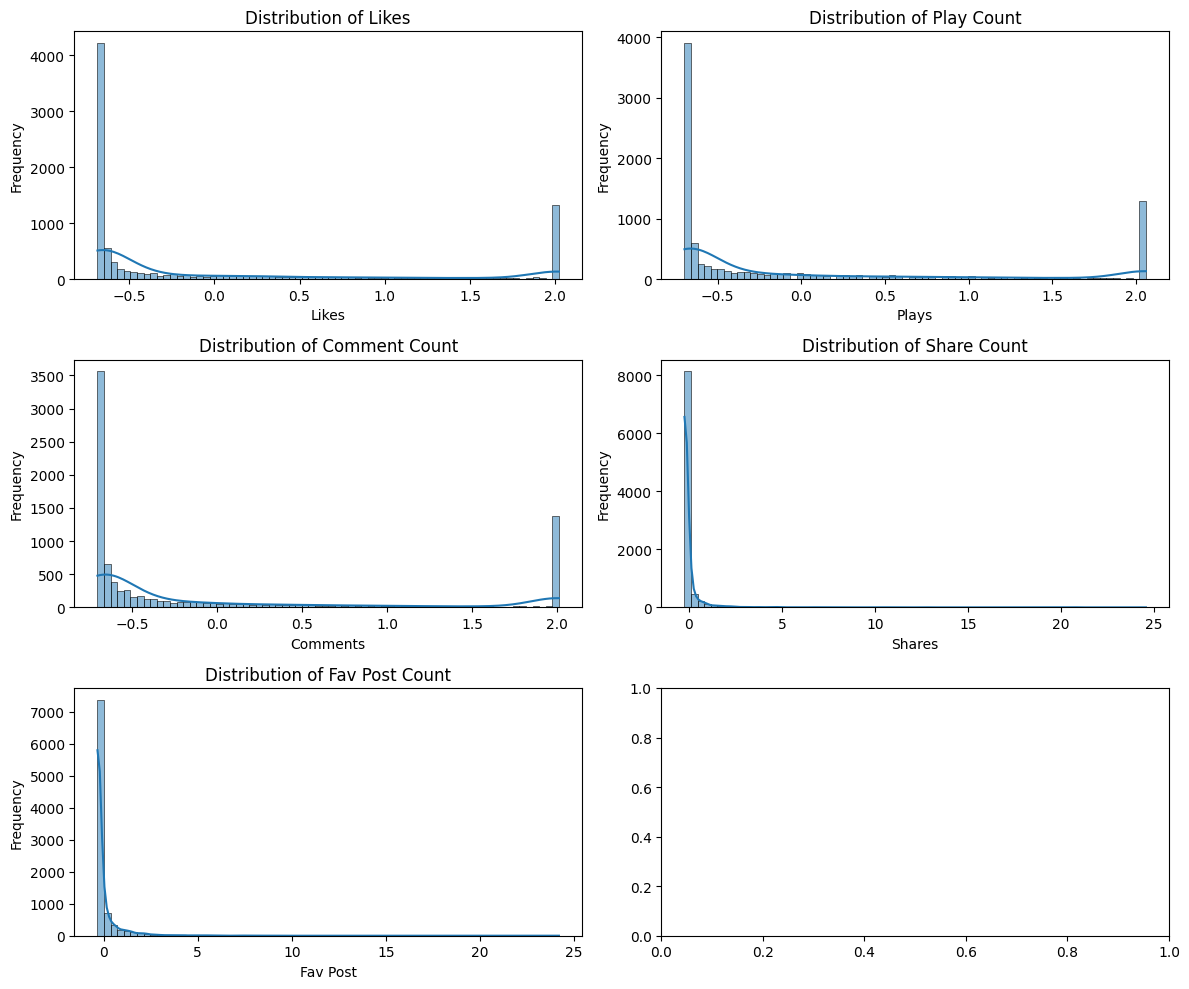

In [55]:
# Setting up the figure and axes for subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Histogram for Likes (digg_count)
sns.histplot(numeric_data_normalized['digg_count'], bins=70, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Likes')
axs[0, 0].set_xlabel('Likes')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Play Count
sns.histplot(numeric_data_normalized['play_count'],bins=70, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Play Count')
axs[0, 1].set_xlabel('Plays')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Comment Count
sns.histplot(numeric_data_normalized['comment_count'], bins=70, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Comment Count')
axs[1, 0].set_xlabel('Comments')
axs[1, 0].set_ylabel('Frequency')

# Histogram for Share Count
sns.histplot(numeric_data_normalized['share_count'], bins=70, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Share Count')
axs[1, 1].set_xlabel('Shares')
axs[1, 1].set_ylabel('Frequency')

# Histogram for Collect Count
sns.histplot(numeric_data_normalized['collect_count'], bins=70, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Fav Post Count')
axs[2, 0].set_xlabel('Fav Post')
axs[2, 0].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

**Engagement Analysis**

Calculate an overall engagement score and identify top-performing posts by this score

In [56]:
# Sort data by engagement score
top_posts = tiktokpost_data_cleaned.sort_values(by='engagement_rate', ascending=False)
print(top_posts[['hashtags', 'engagement_rate']].head(10))  # Top 10 posts by engagement score

                                               hashtags  engagement_rate
1582  [rapunzel, rapunzeledit, tangled, anna, elsa, ...         0.293667
6121                                    [chen_rcj, fyp]         0.293667
9402  [fyp, fyp, fypviral, fypage, foryou, foryoupag...         0.293667
9401  [fyppppppppppppppppppppppp, 10followers, foryo...         0.293667
6126  [simonrileyedit, ghost, modernwarfare2, ghoste...         0.293667
6127  [fyp, foryou, edit, hqfae, trending, foryoupag...         0.293667
9369  [capcut, tiktokmyanmarforyou, tiktokindia, fpy...         0.293667
9361  [kamishirorui, ruikamishiro, rui, wxs, wonderl...         0.293667
6128                                                [_]         0.293667
6149  [venti, xiao, aether, kazuha, genshin, genshin...         0.293667


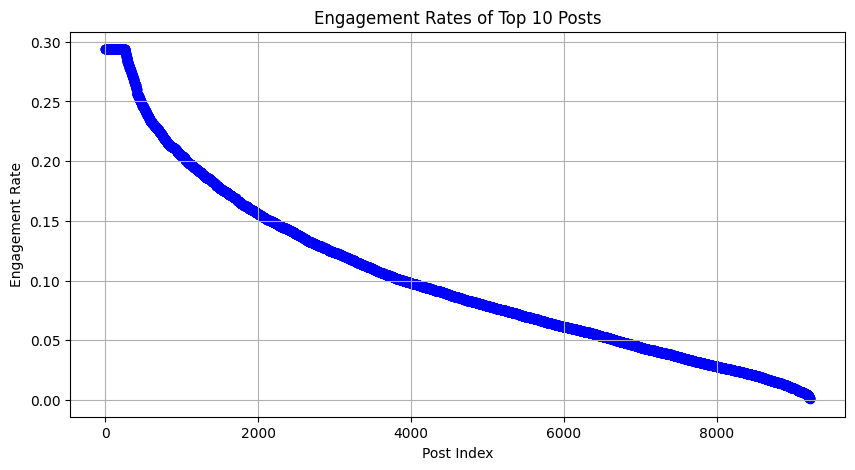

In [57]:
plt.figure(figsize=(10, 5))
plt.scatter(x=range(len(top_posts)), y=top_posts['engagement_rate'], color='blue')
plt.title('Engagement Rates of Top 10 Posts')
plt.xlabel('Post Index')
plt.ylabel('Engagement Rate')
plt.grid(True)
plt.show()

This visualization provides a clear overview of how engagement rates are distributed among the posts. It highlights the existence of a few highly engaging posts (potentially viral) and a large number of posts with low engagement. This insight can be crucial for understanding content performance and strategizing for future content creation.

Examine how engagement changes over time.

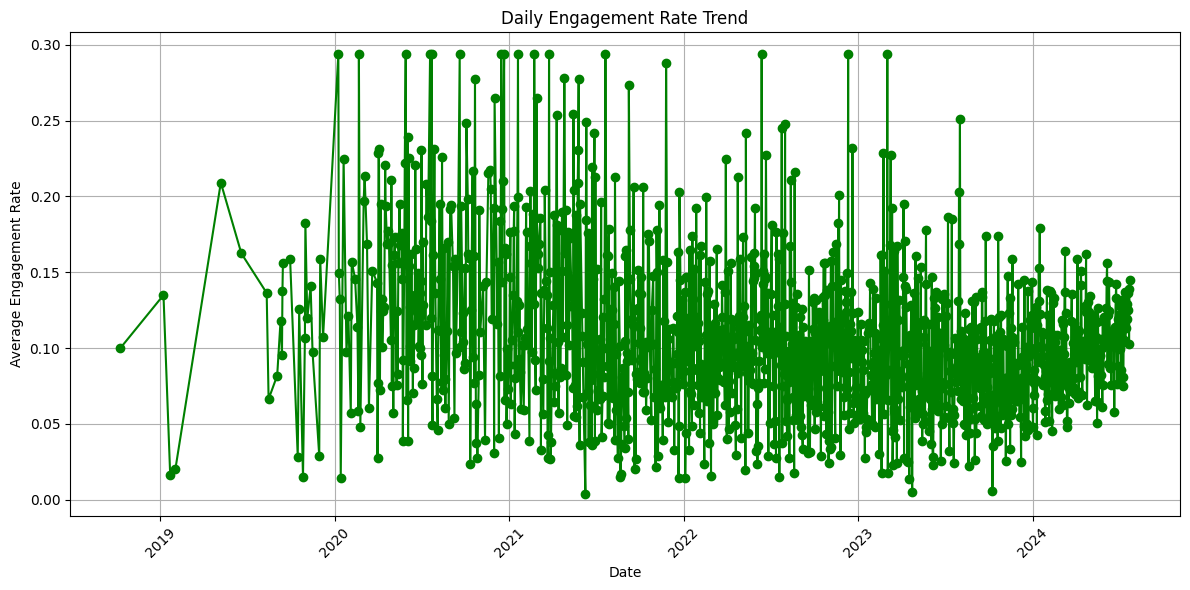

In [58]:
# Aggregate by date (or any other time unit like week/month)
daily_engagement = tiktokpost_data_cleaned.groupby(tiktokpost_data_cleaned['create_ time'].dt.date)['engagement_rate'].mean()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_engagement.index, daily_engagement.values, marker='o', linestyle='-', color='g')
plt.title('Daily Engagement Rate Trend')
plt.xlabel('Date')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for easier reading
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

This time series plot provides a comprehensive view of how the average engagement score has evolved over time. It highlights periods of high engagement, overall trends, and periods of stabilization. For content creators and analysts, understanding these trends can help in strategizing future content, identifying what worked well in the past, and adapting to changes in audience behavior or platform dynamics.

We can count the number of hashtags or create binary features indicating the presence of popular hashtags.

In [59]:
# Count the number of hashtags per post
tiktokpost_data_cleaned['num_hashtags'] = tiktokpost_data_cleaned['hashtags'].apply(len)

# One-hot encode the presence of specific popular hashtags
popular_hashtags = ['artist', 'art', 'foryourpage', 'foryou', 'fypviral', 'foryoupage', 'fyp', 'viral', 'trending', 'tiktok', 'capcut', 'viraltiktok', 'music', 'tiktokmalaysia', 'trend', 'tiktokartist', 'painting']
for tag in popular_hashtags:
    tiktokpost_data_cleaned[f'hashtag_{tag}'] = tiktokpost_data_cleaned['hashtags'].apply(lambda x: int(tag in x))

# Display the first few rows of the DataFrame
tiktokpost_data_cleaned.iloc[:, 8:-1]

,hashtags,post_type,is_verified,play_count_range,total_engagements,engagement_rate,num_hashtags,hashtag_artist,hashtag_art,hashtag_foryourpage,...,hashtag_fyp,hashtag_viral,hashtag_trending,hashtag_tiktok,hashtag_capcut,hashtag_viraltiktok,hashtag_music,hashtag_tiktokmalaysia,hashtag_trend,hashtag_tiktokartist
0,"[letsfaceit, fyp, foryoupage, fy, art, artchal...",video,False,10k-100k,15340.0,0.165838,11,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,"[illustration, sketchbook, tiktokartist, paint...",video,False,10k-100k,11142.0,0.111420,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"[althiphop, reggae, altrnb, musiciansoftiktok,...",video,False,0-2k,73.0,0.114062,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[satisfying, procreate, digital, beautiful, ar...",video,False,2k-10k,307.0,0.121825,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[everykiss, henna, yerawizard, mehndi, hennavi...",video,False,10M-300M,1892688.0,0.089278,11,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10036,"[view, foryourpage, tt]",video,False,0-2k,102.0,0.137466,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10037,"[foryourpage, trend]",video,False,0-2k,152.0,0.201592,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10038,"[sunilthakor6709team, foryourpage, gangster]",video,False,0-2k,66.0,0.234875,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10039,"[foryourpage, view]",video,False,0-2k,318.0,0.185748,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Identify the Most Frequently Used Hashtags**

- To find the most popular hashtags, we can calculate the frequency of each hashtag in our dataset.

- Count Hashtag Occurrences: Calculate the total number of times each hashtag appears in the dataset.

- Top Hashtags: Identify the top N most frequently used hashtags.

In [60]:
from collections import Counter

# Assuming 'hashtags' column contains lists of hashtags
# Flatten the list of hashtags from all posts
all_hashtags = [hashtag for sublist in tiktokpost_data_cleaned['hashtags'] for hashtag in sublist]

# Count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags)

# Convert to a DataFrame for better visualization
hashtag_counts_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Frequency'])

# Sort by frequency in descending order
hashtag_counts_df = hashtag_counts_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(hashtag_counts_df)

                   Hashtag  Frequency
0                      fyp       4799
1                   foryou       2006
2                    viral       1889
3               foryoupage       1293
4              foryourpage       1157
...                    ...        ...
23389           sketchdump          1
23390       apartportfolio          1
23391             thoughts          1
23392            seductive          1
23393  sunilthakor6709team          1

[23394 rows x 2 columns]


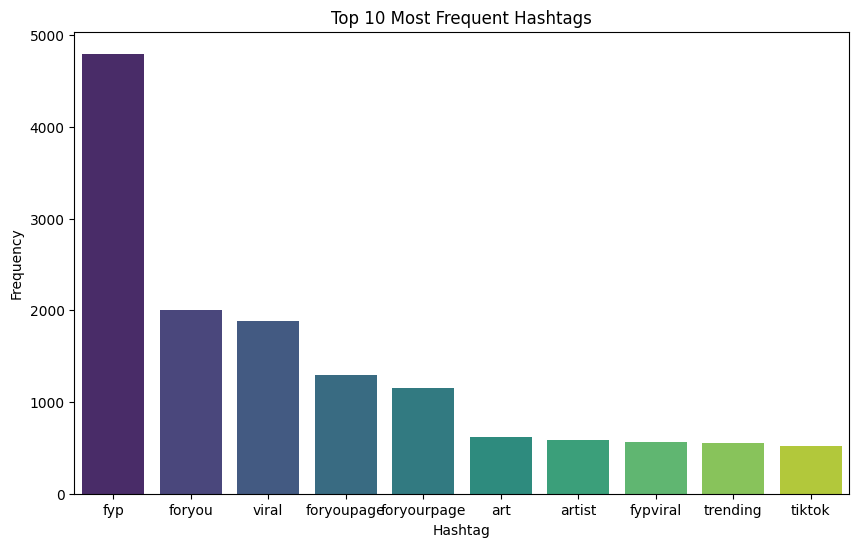

In [61]:
# Plotting the top N hashtags (e.g., top 10)
top_n = 10
top_hashtags = hashtag_counts_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Hashtag', y='Frequency', data=top_hashtags, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()

**Analyze Hashtag Distribution Over Time**

- To understand how the popularity of hashtags changes over time, you can analyze the distribution of hashtag usage across different time periods.

- Date Aggregation: Aggregate hashtag counts by date or another time unit (e.g., week, month).

- Trend Analysis: Visualize the usage trend of popular hashtags over time.

                .   00  00s  00smusic  00throwback   01  0234mytest  \
create_ time                                                          
2018-10-10    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
2019-01-08    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
2019-01-22    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
2019-02-02    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
2019-05-08    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
...           ...  ...  ...       ...          ...  ...         ...   
2024-07-18    0.0  1.0  0.0       0.0          0.0  0.0         0.0   
2024-07-19    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
2024-07-20    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
2024-07-21    0.0  0.0  0.0       0.0          0.0  0.0         0.0   
2024-07-22    0.0  0.0  0.0       0.0          0.0  0.0         0.0   

              0324mytest   04  047  ...  zuzuesandioo  zxbcya  zxycba  zybca

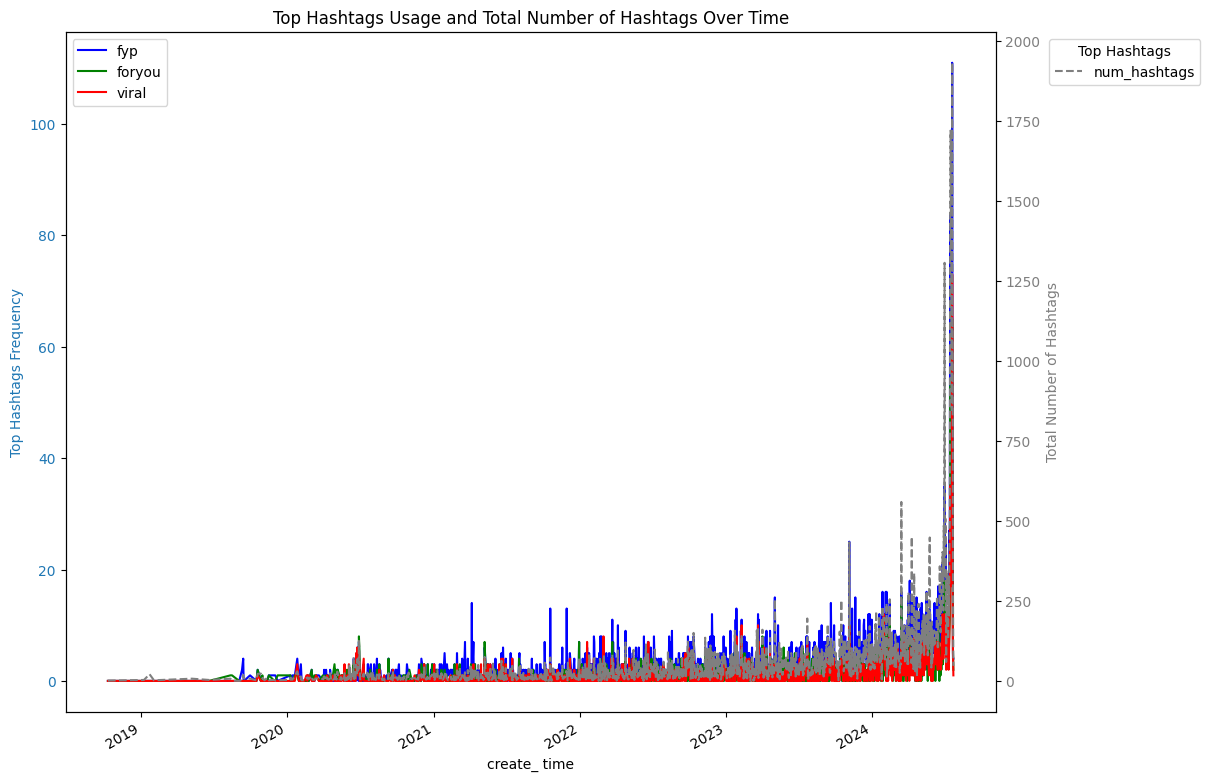

In [62]:
# Flatten hashtags and count frequencies
def count_hashtags(row):
    hashtags = row['hashtags']
    return pd.Series(Counter(hashtags))

# Apply the function to each row and concatenate with the original DataFrame
hashtag_counts_per_row = tiktokpost_data_cleaned.apply(count_hashtags, axis=1).fillna(0)
hashtag_counts_per_row['create_ time'] = tiktokpost_data_cleaned['create_ time']
hashtag_counts_per_row['num_hashtags'] = tiktokpost_data_cleaned['num_hashtags']

# Group by date and sum the hashtag counts
time_based_counts = hashtag_counts_per_row.groupby('create_ time').sum()

# Print the time-based counts DataFrame
print(time_based_counts)

# Identify the top 3 hashtags from the overall hashtag counts
top_hashtags = hashtag_counts_per_row.drop(columns=['create_ time', 'num_hashtags']).sum().nlargest(3).index.tolist()

# Filter time-based counts to include only top hashtags
top_hashtags_data = time_based_counts[top_hashtags]

# Optionally, include total number of hashtags in the plot for comparison
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Top Hashtags Frequency', color=color)
top_hashtags_data.plot(ax=ax1, color=['blue', 'green', 'red'])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:gray'
ax2.set_ylabel('Total Number of Hashtags', color=color)
time_based_counts['num_hashtags'].plot(ax=ax2, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top Hashtags Usage and Total Number of Hashtags Over Time')
plt.legend(title='Top Hashtags', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Key Insights
Dominance of Top Hashtags: The lines representing "fyp," "foryou," and "viral" significantly overshadow the other hashtags, indicating their dominant usage.

Fluctuating Usage: The usage of these top hashtags experiences fluctuations over time, suggesting trends and potential seasonal patterns.

Rapid Growth in Hashtag Usage: The "num_hashtags" line shows a steep upward trend, indicating a substantial increase in overall hashtag usage.

Potential Correlation: There might be a correlation between the usage of top hashtags and the overall increase in hashtag usage.

Outliers: Some spikes in the top hashtag usage lines might represent specific events or trends that caused a sudden surge in their popularity.

**Hashtag Popularity and Engagement**

- Understanding Hashtag Performance
- Analyze the relationship between hashtag frequency and engagement metrics.

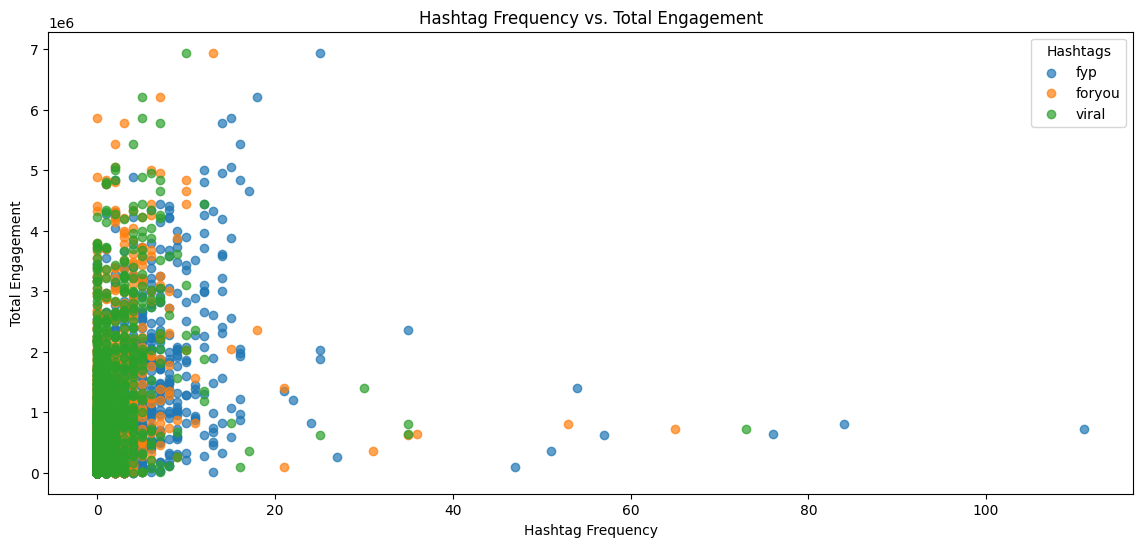

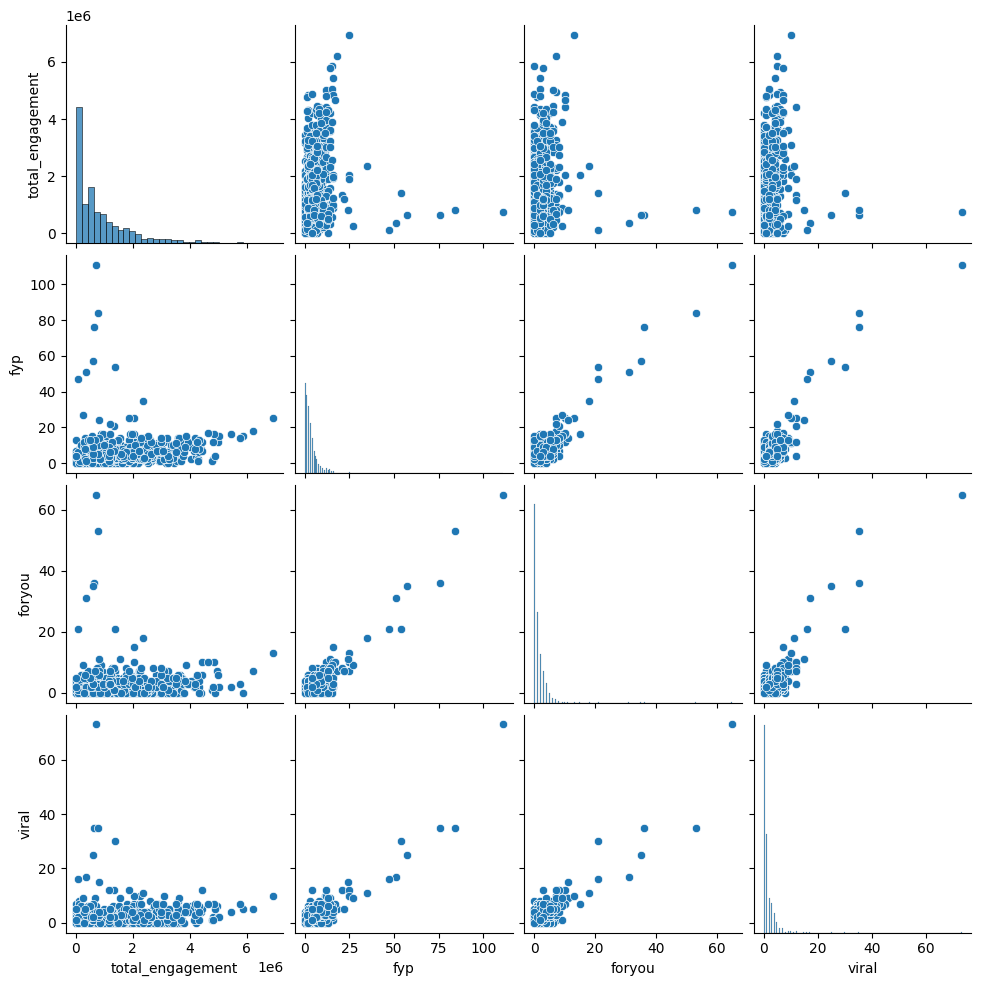

In [63]:
# Flatten hashtags and count frequencies
def count_hashtags(row):
    hashtags = row['hashtags']
    return pd.Series(Counter(hashtags))

hashtag_counts_per_row = tiktokpost_data_cleaned.apply(count_hashtags, axis=1).fillna(0)
hashtag_counts_per_row['create_ time'] = tiktokpost_data_cleaned['create_ time']
hashtag_counts_per_row['digg_count'] = tiktokpost_data_cleaned['digg_count']
hashtag_counts_per_row['share_count'] = tiktokpost_data_cleaned['share_count']
hashtag_counts_per_row['comment_count'] = tiktokpost_data_cleaned['comment_count']
hashtag_counts_per_row['collect_count'] = tiktokpost_data_cleaned['collect_count']

# Aggregate counts and engagement metrics by date
daily_hashtag_counts = hashtag_counts_per_row.groupby('create_ time').sum()

# Calculate total engagement
daily_hashtag_counts['total_engagement'] = daily_hashtag_counts[['digg_count', 'share_count', 'comment_count', 'collect_count']].sum(axis=1)

# Define the top hashtags you want to analyze
top_hashtags = ['fyp', 'foryou', 'viral']  # actual top hashtags

# Plot relationship between hashtag frequency and engagement metrics
plt.figure(figsize=(14, 6))

for hashtag in top_hashtags:
    plt.scatter(daily_hashtag_counts[hashtag], daily_hashtag_counts['total_engagement'], label=hashtag, alpha=0.7)

plt.title('Hashtag Frequency vs. Total Engagement')
plt.xlabel('Hashtag Frequency')
plt.ylabel('Total Engagement')
plt.legend(title='Hashtags')
plt.show()

# Optionally, use seaborn to create pair plots or heatmaps for more advanced analysis
sns.pairplot(daily_hashtag_counts[['total_engagement'] + top_hashtags])
plt.show()

Key Observations:
No Strong Linear Relationship: There doesn't appear to be a strong linear correlation between total engagement and the frequency of any of the three hashtags. The scatterplots show a scattered distribution of points, indicating that other factors likely influence engagement beyond hashtag usage.

Wide Range of Engagement: The distribution of total engagement is skewed towards lower values, with a few outliers representing very high engagement levels.

Hashtag Distribution: The histograms on the diagonal show the distribution of each hashtag's frequency. "fyp" appears to be the most frequently used hashtag.

In [64]:
# Calculate average engagement rate for verified and non-verified users
verified_stats = tiktokpost_data_cleaned.groupby('is_verified')['engagement_rate'].mean()

# Display the result
print(verified_stats)

is_verified
False    0.103435
True     0.089823
Name: engagement_rate, dtype: float64


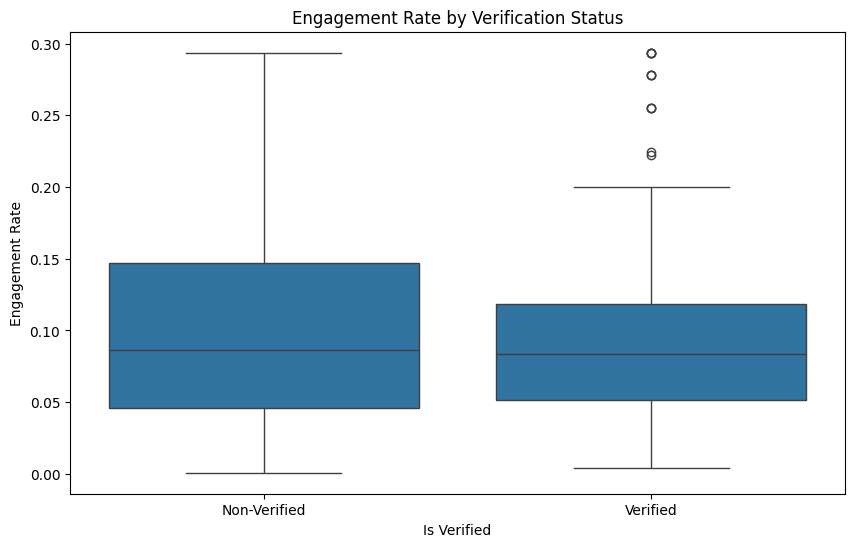

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_verified', y='engagement_rate', data=tiktokpost_data_cleaned)
plt.title('Engagement Rate by Verification Status')
plt.xlabel('Is Verified')
plt.ylabel('Engagement Rate')
plt.xticks([0, 1], ['Non-Verified', 'Verified'])  # Assuming is_verified is binary with 0 and 1
plt.show()

This box plot provides a comparative view of engagement rates between verified and non-verified users. It suggests that while verification does not necessarily guarantee higher engagement, it is associated with more consistent engagement levels. Non-verified users have a broader range of engagement rates, with the potential for both low and exceptionally high engagement. This insight can be valuable for content creators in understanding the impact of verification status on audience engagement.

In [66]:
tiktokpost_data_cleaned.head(10)

,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,hashtags,post_type,...,hashtag_viral,hashtag_trending,hashtag_tiktok,hashtag_capcut,hashtag_viraltiktok,hashtag_music,hashtag_tiktokmalaysia,hashtag_trend,hashtag_tiktokartist,hashtag_painting
0,Paco Aguilar El Gallo Negro! #LetsFaceIt #fyp ...,2020-07-15,14400.0,198.0,639,103.00,92500.0,28,"[letsfaceit, fyp, foryoupage, fy, art, artchal...",video,...,0,0,0,0,0,0,0,0,0,0
1,#illustration #sketchbook #tiktokartist #paint...,2020-08-10,10000.0,37.0,1052,53.00,100000.0,39,"[illustration, sketchbook, tiktokartist, paint...",video,...,0,0,0,0,0,0,0,0,1,0
2,Experimenting what ya think? #althiphop #regga...,2023-07-03,62.0,7.0,4,0.00,640.0,10,"[althiphop, reggae, altrnb, musiciansoftiktok,...",video,...,0,0,0,0,0,0,0,0,0,0
3,rate it from 1 to 10 #satisfying #procreate #d...,2020-05-21,290.0,4.0,7,6.00,2520.0,20,"[satisfying, procreate, digital, beautiful, ar...",video,...,0,0,0,0,0,0,0,0,0,0
4,Beginner henna design #EveryKiss #henna #YerAW...,2021-12-31,403717.0,37700.0,149130,2467.25,5735901.5,46,"[everykiss, henna, yerawizard, mehndi, hennavi...",video,...,0,0,0,0,0,0,0,0,0,0
5,ich liebe die kleinen kann es kaum erwarten ...,2024-07-15,3.0,7.0,0,0.00,592.0,6,"[normalseinkannjeder, diy, art, artist, artwor...",video,...,0,0,0,0,0,0,0,0,0,1
6,Merida #disney #vlog#disney#fan#art#artist#mer...,2021-05-03,21400.0,38.0,253,98.00,154200.0,25,"[disney, vlog, disney, fan, art, artist, merid...",video,...,0,0,0,0,0,0,0,0,0,0
7,"All that glitters is not gold, sometimes its j...",2024-01-02,3382.0,47.0,1142,25.00,76500.0,29,"[procreatetutorial, customtype, handlettering,...",video,...,0,0,0,0,0,0,0,0,0,0
8,#jly #scotty #theroots #remix #remixchallenge ...,2024-07-14,45.0,7.0,12,3.00,1165.0,98,"[jly, scotty, theroots, remix, remixchallenge,...",video,...,0,0,1,0,0,1,0,0,0,0
9,Waves under golden skies My website is linked...,2024-07-12,114.0,1.0,4,14.00,583.0,17,"[art, painting, oilpainting, fyp, fy, viral, c...",video,...,1,0,0,1,0,0,0,0,0,1


In [67]:
tiktokpost_data_cleaned.describe()

,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,total_engagements,engagement_rate,num_hashtags,...,hashtag_viral,hashtag_trending,hashtag_tiktok,hashtag_capcut,hashtag_viraltiktok,hashtag_music,hashtag_tiktokmalaysia,hashtag_trend,hashtag_tiktokartist,hashtag_painting
count,9216,9216.000000,9216.000000,9.216000e+03,9216.000000,9.216000e+03,9216.000000,9.216000e+03,9216.000000,9216.000000,...,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.00000,9216.000000
mean,2023-06-02 15:18:26.250000128,102227.977105,8943.870877,2.087258e+04,641.292860,1.452867e+06,36.440864,2.716851e+05,0.102846,8.775174,...,0.196181,0.055881,0.052300,0.043077,0.018012,0.011502,0.025065,0.027886,0.00293,0.012912
min,2018-10-10 00:00:00,0.000000,1.000000,0.000000e+00,0.000000,1.800000e+01,0.000000,2.000000e+00,0.000732,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2022-10-02 00:00:00,522.000000,14.000000,3.100000e+01,11.000000,9.399000e+03,12.000000,6.180000e+02,0.045997,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2023-10-21 00:00:00,9454.000000,265.500000,8.750000e+02,106.000000,1.948500e+05,19.000000,1.141200e+04,0.085978,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2024-05-18 00:00:00,161800.000000,3559.500000,1.399700e+04,993.500000,2.300000e+06,44.000000,1.893430e+05,0.145065,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,2024-07-22 00:00:00,403717.000000,970800.000000,1.556405e+06,2467.250000,5.735902e+06,637.000000,2.338575e+07,0.293667,258.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
std,NaN,149101.765806,39173.425709,6.346645e+04,908.769397,2.079997e+06,47.561491,8.235291e+05,0.071945,10.892291,...,0.397128,0.229704,0.222644,0.203042,0.133002,0.106633,0.156331,0.164656,0.05405,0.112903


In [68]:
# Adjust display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
tiktokpost_data_cleaned.head()

,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,hashtags,post_type,is_verified,play_count_range,total_engagements,engagement_rate,num_hashtags,hashtag_artist,hashtag_art,hashtag_foryourpage,hashtag_foryou,hashtag_fypviral,hashtag_foryoupage,hashtag_fyp,hashtag_viral,hashtag_trending,hashtag_tiktok,hashtag_capcut,hashtag_viraltiktok,hashtag_music,hashtag_tiktokmalaysia,hashtag_trend,hashtag_tiktokartist,hashtag_painting
0,Paco Aguilar El Gallo Negro! #LetsFaceIt #fyp ...,2020-07-15,14400.0,198.0,639,103.00,92500.0,28,"[letsfaceit, fyp, foryoupage, fy, art, artchal...",video,False,10k-100k,15340.0,0.165838,11,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,#illustration #sketchbook #tiktokartist #paint...,2020-08-10,10000.0,37.0,1052,53.00,100000.0,39,"[illustration, sketchbook, tiktokartist, paint...",video,False,10k-100k,11142.0,0.111420,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Experimenting what ya think? #althiphop #regga...,2023-07-03,62.0,7.0,4,0.00,640.0,10,"[althiphop, reggae, altrnb, musiciansoftiktok,...",video,False,0-2k,73.0,0.114062,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,rate it from 1 to 10 #satisfying #procreate #d...,2020-05-21,290.0,4.0,7,6.00,2520.0,20,"[satisfying, procreate, digital, beautiful, ar...",video,False,2k-10k,307.0,0.121825,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Beginner henna design #EveryKiss #henna #YerAW...,2021-12-31,403717.0,37700.0,149130,2467.25,5735901.5,46,"[everykiss, henna, yerawizard, mehndi, hennavi...",video,False,10M-300M,1892688.0,0.089278,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
# Correlation matrix
correlation_matrix1 = tiktokpost_data_cleaned[engagement_metrics + ['num_hashtags']].corr()
print("Correlation matrix:\n", correlation_matrix1)

Correlation matrix:
                  digg_count  share_count  collect_count  comment_count  \
digg_count         1.000000     0.378128       0.560714       0.858690   
share_count        0.378128     1.000000       0.491306       0.384025   
collect_count      0.560714     0.491306       1.000000       0.510028   
comment_count      0.858690     0.384025       0.510028       1.000000   
play_count         0.895412     0.381429       0.527678       0.804006   
engagement_rate    0.194434     0.084119       0.176996       0.164220   
num_hashtags      -0.046640    -0.008885      -0.014141      -0.039792   

                 play_count  engagement_rate  num_hashtags  
digg_count         0.895412         0.194434     -0.046640  
share_count        0.381429         0.084119     -0.008885  
collect_count      0.527678         0.176996     -0.014141  
comment_count      0.804006         0.164220     -0.039792  
play_count         1.000000        -0.036143     -0.036714  
engagement_rate   -0

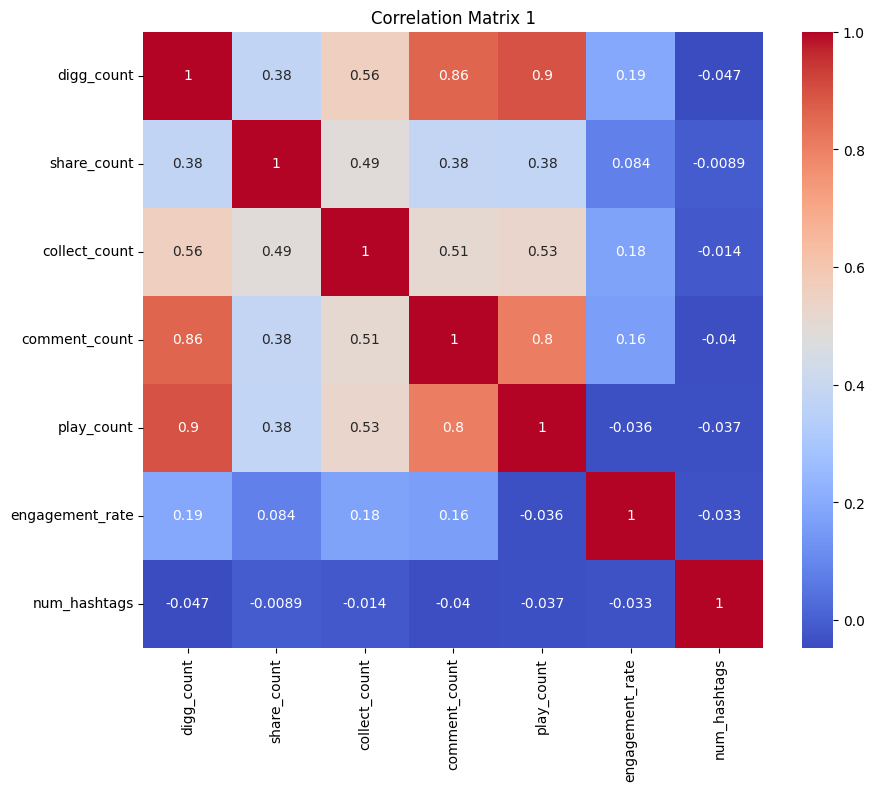

In [70]:
#visualization of correlation between numeric column
figsize = (10, 8)
plt.figure(figsize=figsize)

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix 1')
plt.show()

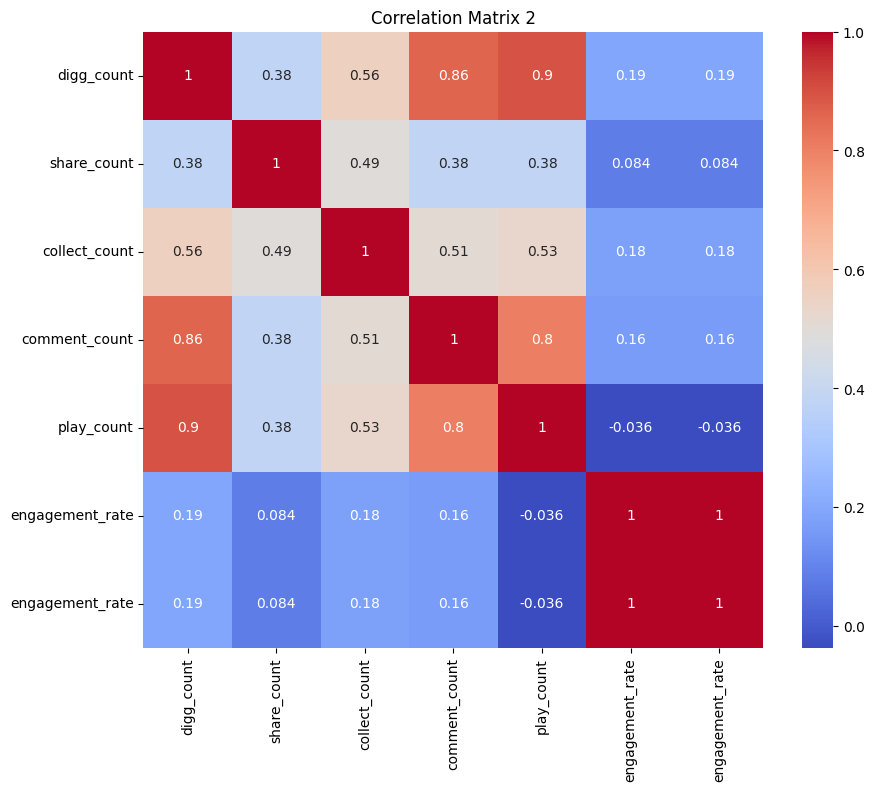

In [71]:
# Correlation matrix
correlation_matrix2 = tiktokpost_data_cleaned[engagement_metrics + ['engagement_rate']].corr()

#visualization of correlation between numeric column
figsize = (10, 8)
plt.figure(figsize=figsize)

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix 2')
plt.show()

In [72]:
import scipy.stats as stats
from scipy.stats import pearsonr

# List of column names representing the count or presence of specific popular hashtags
pophashtag_columns = ['hashtag_artist', 'hashtag_art', 'hashtag_foryourpage', 'hashtag_foryou',
                   'hashtag_fypviral', 'hashtag_foryoupage', 'hashtag_fyp', 'hashtag_viral',
                   'hashtag_trending', 'hashtag_tiktok', 'hashtag_capcut', 'hashtag_viraltiktok',
                   'hashtag_music', 'hashtag_tiktokmalaysia', 'hashtag_trend',	'hashtag_tiktokartist',	'hashtag_painting']

# Sum the values across these columns to get the total number of popular hashtags for each post
tiktokpost_data_cleaned['num_popular_hashtags'] = tiktokpost_data_cleaned[pophashtag_columns].sum(axis=1)

# Calculate the correlation between the number of popular hashtags and the view count
correlation, p_value = pearsonr(tiktokpost_data_cleaned['num_popular_hashtags'], tiktokpost_data_cleaned['play_count'])

# Print the results
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: -0.06373335957333476
P-value: 9.137033572298608e-10


In [73]:
# Calculate the correlation between the number of popular hashtags and the view count
correlation, p_value = pearsonr(tiktokpost_data_cleaned['num_popular_hashtags'], tiktokpost_data_cleaned['digg_count'])

# Print the results
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: -0.06166337780627254
P-value: 3.132119833460981e-09


In [74]:
# Calculate the correlation between the number of popular hashtags and the view count
correlation, p_value = pearsonr(tiktokpost_data_cleaned['num_popular_hashtags'], tiktokpost_data_cleaned['engagement_rate'])

# Print the results
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: 0.053629119978107244
P-value: 2.585431606458966e-07


In [75]:
# Creating interaction terms
tiktokpost_data_cleaned['num_hashtags_play_count'] = tiktokpost_data_cleaned['num_popular_hashtags'] * tiktokpost_data_cleaned['play_count']
tiktokpost_data_cleaned['verified_popular_hashtags'] = tiktokpost_data_cleaned['is_verified'] * tiktokpost_data_cleaned['num_popular_hashtags']
tiktokpost_data_cleaned['likes_popular_hashtags'] = tiktokpost_data_cleaned['digg_count'] * tiktokpost_data_cleaned['num_popular_hashtags']
tiktokpost_data_cleaned['video_length_popular_hashtags'] = tiktokpost_data_cleaned['video_duration'] * tiktokpost_data_cleaned['num_popular_hashtags']

# List of interaction term columns
interaction_columns = ['num_hashtags_play_count', 'verified_popular_hashtags', 'likes_popular_hashtags', 'video_length_popular_hashtags']

# Calculate correlation between each interaction term and view count
for column in interaction_columns:
    correlation, p_value = pearsonr(tiktokpost_data_cleaned[column], tiktokpost_data_cleaned['play_count'])
    print(f"Correlation between {column} and view_count: {correlation}")
    print(f"P-value: {p_value}\n")

Correlation between num_hashtags_play_count and view_count: 0.5854129368745011
P-value: 0.0

Correlation between verified_popular_hashtags and view_count: 0.10055641770374196
P-value: 3.7896242882783095e-22

Correlation between likes_popular_hashtags and view_count: 0.5405720706781432
P-value: 0.0

Correlation between video_length_popular_hashtags and view_count: -0.03626876949919806
P-value: 0.0004968010947920586



In [76]:
# Assuming each hashtag is separated by a space in the 'hashtags' column
from collections import Counter

all_hashtags = [hashtag for sublist in tiktokpost_data_cleaned['hashtags'] for hashtag in sublist]

# Count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags)

# Define a threshold for popular hashtags, e.g., top 10%
popular_hashtags = {hashtag for hashtag, count in hashtag_counts.items() if count > np.percentile(list(hashtag_counts.values()), 90)}

def has_popular_hashtag(hashtags, popular_hashtags):
  return any(hashtag in popular_hashtags for hashtag in hashtags)

tiktokpost_data_cleaned['popular_hashtags'] = tiktokpost_data_cleaned['hashtags'].apply(lambda x: has_popular_hashtag(x, popular_hashtags))

In [77]:
# Comparing engagement for posts with popular hashtags vs. non-popular hashtags
popular_df = tiktokpost_data_cleaned[tiktokpost_data_cleaned['popular_hashtags']]
non_popular_df = tiktokpost_data_cleaned[~tiktokpost_data_cleaned['popular_hashtags']]

# Average engagement metrics
print("Average engagement with popular hashtags:\n", popular_df[engagement_metrics].mean())
print("Average engagement without popular hashtags:\n", non_popular_df[engagement_metrics].mean())

Average engagement with popular hashtags:
 digg_count         1.033998e+05
share_count        8.670823e+03
collect_count      2.095483e+04
comment_count      6.470783e+02
play_count         1.457791e+06
engagement_rate    1.045874e-01
dtype: float64
Average engagement without popular hashtags:
 digg_count         8.924536e+04
share_count        1.196886e+04
collect_count      1.996133e+04
comment_count      5.771979e+02
play_count         1.398318e+06
engagement_rate    8.355139e-02
dtype: float64


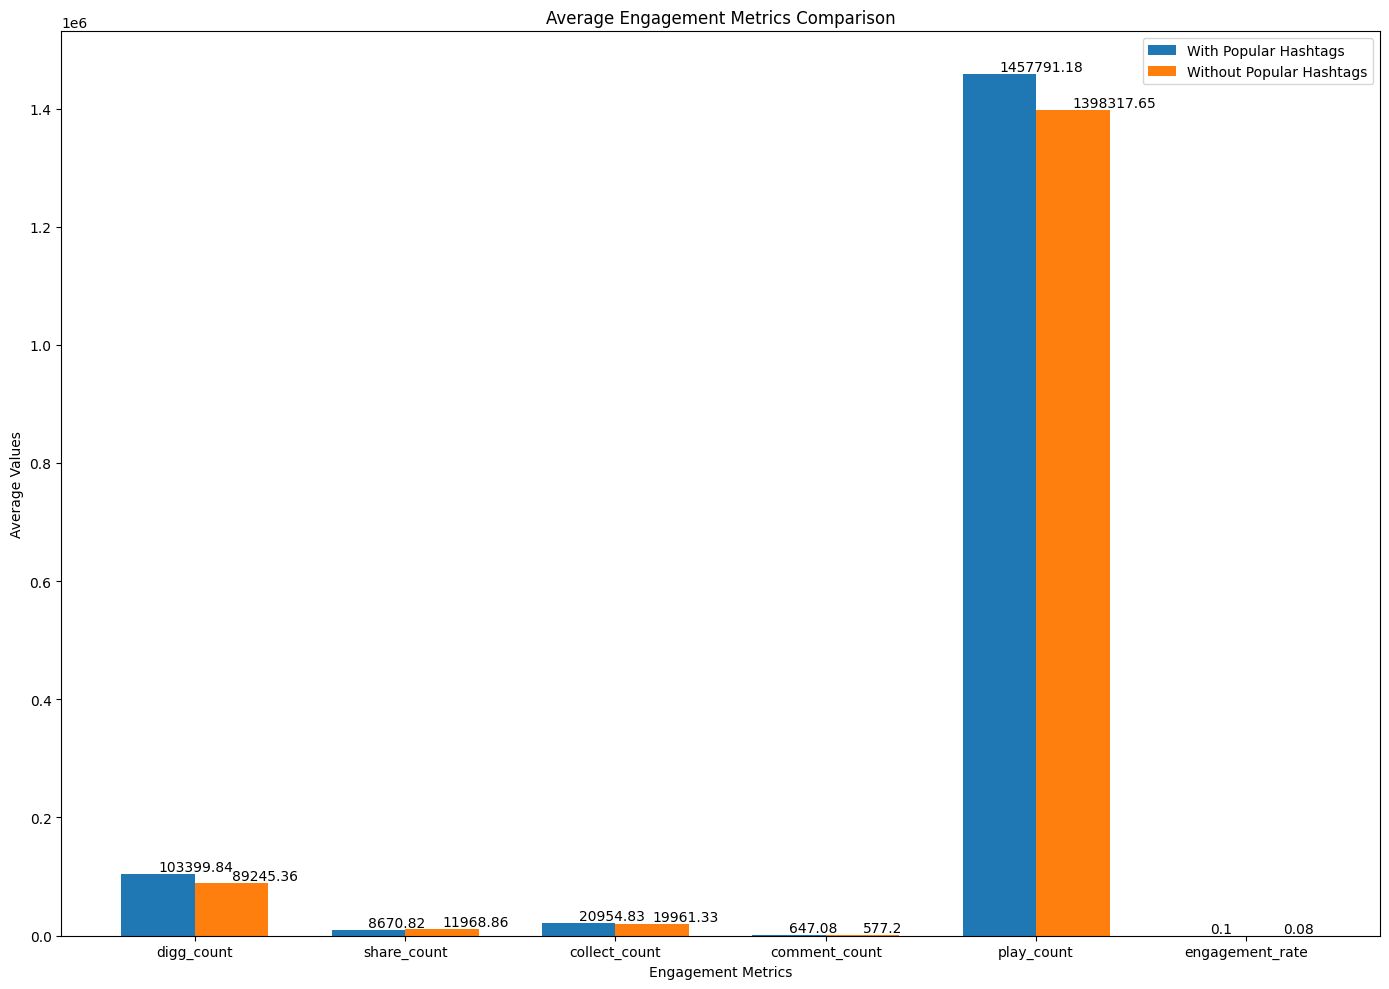

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Define engagement metrics and their corresponding values for both categories
metrics = ['digg_count', 'share_count', 'collect_count', 'comment_count', 'play_count', 'engagement_rate']
values_with_hashtags = popular_df[engagement_metrics].mean()
values_without_hashtags = non_popular_df[engagement_metrics].mean()

# Set the width of each bar
bar_width = 0.35
index = np.arange(len(metrics))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(14, 10))
bars1 = ax.bar(index, values_with_hashtags, bar_width, label='With Popular Hashtags')
bars2 = ax.bar(index + bar_width, values_without_hashtags, bar_width, label='Without Popular Hashtags')

# Adding labels, title, and legend
ax.set_xlabel('Engagement Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Average Engagement Metrics Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Adding value labels to bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom') # Format value to two decimal places

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

In [79]:
# Creating features
def count_popular_hashtags(hashtags, popular_hashtags):
  return sum(1 for hashtag in hashtags if hashtag in popular_hashtags)

tiktokpost_data_cleaned['num_popular_hashtags'] = tiktokpost_data_cleaned['hashtags'].apply(lambda x: count_popular_hashtags(x, popular_hashtags))
tiktokpost_data_cleaned['verified_popular_hashtags'] = tiktokpost_data_cleaned['popular_hashtags'] & tiktokpost_data_cleaned['is_verified']

**Looks good. Now, we can start normalize the numerical columns for regression model**

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize
numerical_cols = ['digg_count', 'share_count', 'comment_count', 'collect_count', 'play_count', 'num_hashtags', 'video_duration', 'total_engagements', 'num_hashtags_play_count', 'likes_popular_hashtags', 'video_length_popular_hashtags']
scaler = MinMaxScaler()

# Apply scaler and add back to the DataFrame
tiktokpost_data_cleaned[numerical_cols] = scaler.fit_transform(tiktokpost_data_cleaned[numerical_cols])

tiktokpost_data_cleaned['is_verified'] = tiktokpost_data_cleaned['is_verified'].apply(lambda x: 1 if x else 0)

tiktokpost_data_cleaned.head()

,description,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,hashtags,post_type,is_verified,play_count_range,total_engagements,engagement_rate,num_hashtags,hashtag_artist,hashtag_art,hashtag_foryourpage,hashtag_foryou,hashtag_fypviral,hashtag_foryoupage,hashtag_fyp,hashtag_viral,hashtag_trending,hashtag_tiktok,hashtag_capcut,hashtag_viraltiktok,hashtag_music,hashtag_tiktokmalaysia,hashtag_trend,hashtag_tiktokartist,hashtag_painting,num_popular_hashtags,num_hashtags_play_count,verified_popular_hashtags,likes_popular_hashtags,video_length_popular_hashtags,popular_hashtags
0,Paco Aguilar El Gallo Negro! #LetsFaceIt #fyp ...,2020-07-15,0.035669,0.000203,0.000411,0.041747,0.016123,0.043956,"[letsfaceit, fyp, foryoupage, fy, art, artchal...",video,0,10k-100k,0.000656,0.165838,0.038911,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8,0.006451,False,0.014267,0.043077,True
1,#illustration #sketchbook #tiktokartist #paint...,2020-08-10,0.024770,0.000037,0.000676,0.021481,0.017431,0.061224,"[illustration, sketchbook, tiktokartist, paint...",video,0,10k-100k,0.000476,0.111420,0.015564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0.001743,False,0.002477,0.015000,True
2,Experimenting what ya think? #althiphop #regga...,2023-07-03,0.000154,0.000006,0.000003,0.000000,0.000108,0.015699,"[althiphop, reggae, altrnb, musiciansoftiktok,...",video,0,0-2k,0.000003,0.114062,0.015564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.000000,False,0.000000,0.000000,True
3,rate it from 1 to 10 #satisfying #procreate #d...,2020-05-21,0.000718,0.000003,0.000004,0.002432,0.000436,0.031397,"[satisfying, procreate, digital, beautiful, ar...",video,0,2k-10k,0.000013,0.121825,0.027237,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0.000044,False,0.000072,0.007692,True
4,Beginner henna design #EveryKiss #henna #YerAW...,2021-12-31,1.000000,0.038833,0.095817,1.000000,1.000000,0.072214,"[everykiss, henna, yerawizard, mehndi, hennavi...",video,0,10M-300M,0.080933,0.089278,0.038911,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.200000,False,0.200000,0.035385,True


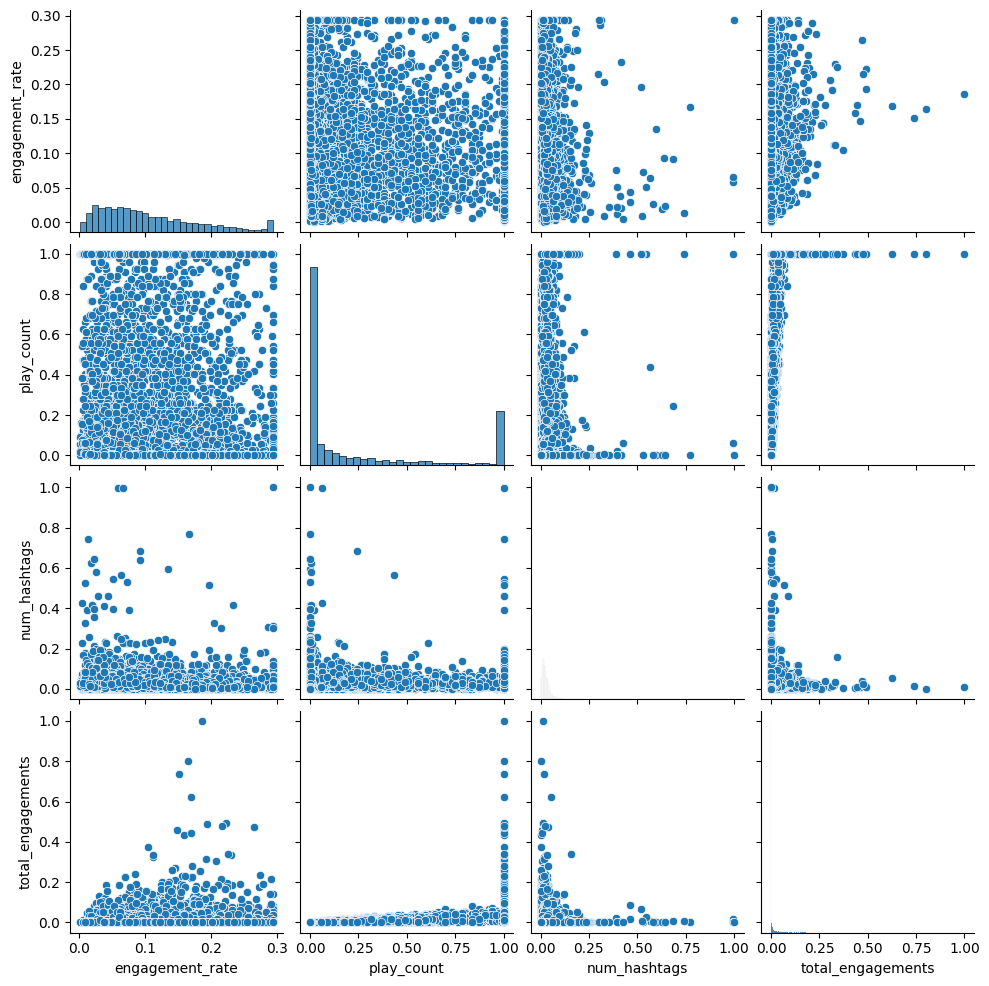

In [81]:
sns.pairplot(tiktokpost_data_cleaned[['engagement_rate', 'play_count', 'num_hashtags', 'total_engagements']])
plt.show()

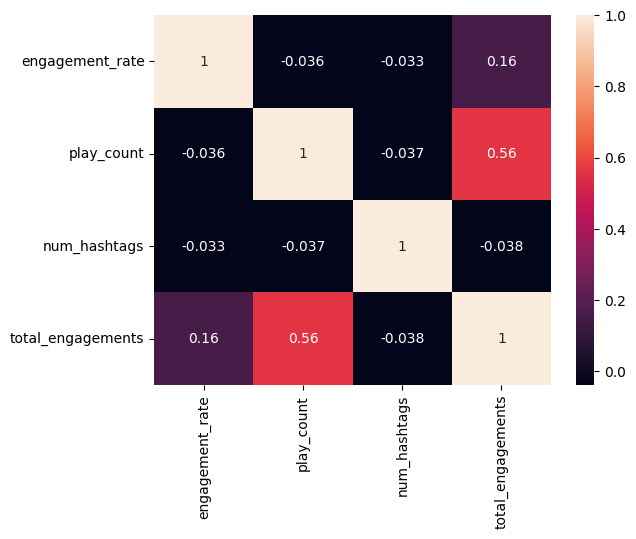

In [82]:
correlation_matrix = tiktokpost_data_cleaned[['engagement_rate', 'play_count', 'num_hashtags', 'total_engagements']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

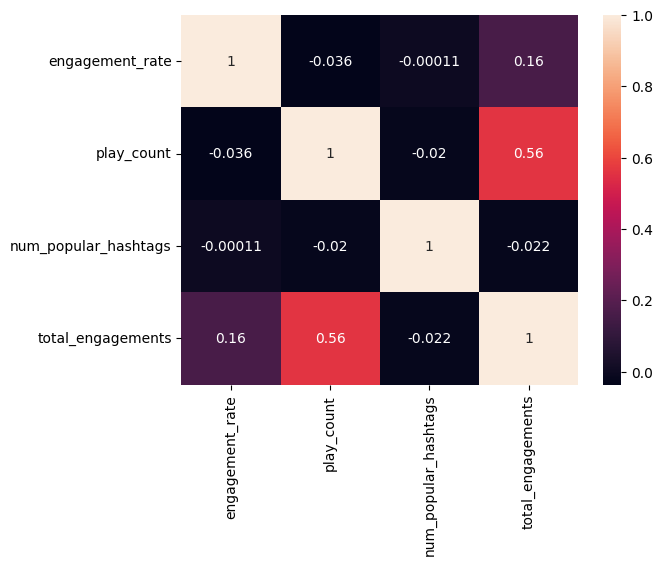

In [83]:
correlation_matrix = tiktokpost_data_cleaned[['engagement_rate', 'play_count', 'num_popular_hashtags', 'total_engagements']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [84]:
# Save as a CSV file
tiktokpost_data_cleaned.to_csv('cleaned_tiktok_data.csv', index=False)

In [85]:
tiktokpost_data_cleaned.shape

(9216, 38)

### **7. Data Modeling**

In [146]:
features = ['play_count', 'num_hashtags', 'total_engagements', 'is_verified', 'video_duration']
X = tiktokpost_data_cleaned[features]
y_rg = tiktokpost_data_cleaned['engagement_rate']

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_rg, test_size=0.2, random_state=42)

In [148]:
def print_regression_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred):.4f}")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred):.4f}")
        print(f"R² Score: {r2_score(y_train, pred):.4f}")
        print("_______________________________________________")

    else:
        pred = model.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred):.4f}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred):.4f}")
        print(f"R² Score: {r2_score(y_test, pred):.4f}")
        print("_______________________________________________")

**Random Forest Regressor**

In [149]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)

rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print_regression_score(rf_model, X_train, y_train, X_test, y_test, train=True)
print_regression_score(rf_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Absolute Error: 0.0021
Mean Squared Error: 0.0000
R² Score: 0.9942
_______________________________________________
Test Result:
Mean Absolute Error: 0.0055
Mean Squared Error: 0.0002
R² Score: 0.9547
_______________________________________________


In [150]:
# Store results in DataFrame
reg_results_df = pd.DataFrame(data=[[
    "Random Forest Regressor",
    rf_train_r2,
    rf_test_r2
]], columns=[
    'Model','Train R2',
    'Test R2'
])

reg_results_df

,Model,Train R2,Test R2
0,Random Forest Regressor,0.994226,0.954725


**Gradient Boost Regressor**

In [151]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

gb_train_mae = mean_absolute_error(y_train, gb_train_pred)
gb_train_mse = mean_squared_error(y_train, gb_train_pred)
gb_train_r2 = r2_score(y_train, gb_train_pred)

gb_test_mae = mean_absolute_error(y_test, gb_test_pred)
gb_test_mse = mean_squared_error(y_test, gb_test_pred)
gb_test_r2 = r2_score(y_test, gb_test_pred)

print_regression_score(gb_model, X_train, y_train, X_test, y_test, train=True)
print_regression_score(gb_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Absolute Error: 0.0190
Mean Squared Error: 0.0008
R² Score: 0.8412
_______________________________________________
Test Result:
Mean Absolute Error: 0.0202
Mean Squared Error: 0.0010
R² Score: 0.8118
_______________________________________________


In [152]:
# Store results in DataFrame
reg_results_df2 = pd.DataFrame(data=[[
    "Gradient Boosting Regressor",
    gb_train_r2,
    gb_test_r2
]], columns=[
    'Model','Train R2',
    'Test R2'
])

reg_results_df= pd.concat([reg_results_df, reg_results_df2], ignore_index=True)
reg_results_df

,Model,Train R2,Test R2
0,Random Forest Regressor,0.994226,0.954725
1,Gradient Boosting Regressor,0.841243,0.811786


**Polynomial**

In [153]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Polynomial Regression
degree = 7  # Adjust the degree of the polynomial as needed
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
poly_train_pred = poly_model.predict(X_train)
poly_test_pred = poly_model.predict(X_test)

poly_train_mae = mean_absolute_error(y_train, poly_train_pred)
poly_train_mse = mean_squared_error(y_train, poly_train_pred)
poly_train_r2 = r2_score(y_train, poly_train_pred)

poly_test_mae = mean_absolute_error(y_test, poly_test_pred)
poly_test_mse = mean_squared_error(y_test, poly_test_pred)
poly_test_r2 = r2_score(y_test, poly_test_pred)

print_regression_score(poly_model, X_train, y_train, X_test, y_test, train=True)
print_regression_score(poly_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Absolute Error: 0.0305
Mean Squared Error: 0.0021
R² Score: 0.5935
_______________________________________________
Test Result:
Mean Absolute Error: 6.5181
Mean Squared Error: 30454.9801
R² Score: -6015215.2800
_______________________________________________


In [154]:
# Store results in DataFrame
reg_results_df2 = pd.DataFrame(data=[[
    "Polynomial",
    poly_train_r2,
    poly_test_r2
]], columns=[
    'Model','Train R2',
    'Test R2'
])

reg_results_df= pd.concat([reg_results_df, reg_results_df2], ignore_index=True)
reg_results_df

,Model,Train R2,Test R2
0,Random Forest Regressor,0.994226,9.547247e-01
1,Gradient Boosting Regressor,0.841243,8.117859e-01
2,Polynomial,0.593457,-6.015215e+06


**XGBoost Regressor**

In [155]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgb_train_pred)
xgb_train_r2 = r2_score(y_train, xgb_train_pred)

xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)
xgb_test_mse = mean_squared_error(y_test, xgb_test_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

print_regression_score(xgb_model, X_train, y_train, X_test, y_test, train=True)
print_regression_score(xgb_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Absolute Error: 0.0042
Mean Squared Error: 0.0001
R² Score: 0.9903
_______________________________________________
Test Result:
Mean Absolute Error: 0.0080
Mean Squared Error: 0.0003
R² Score: 0.9438
_______________________________________________


In [156]:
# Store results in DataFrame
reg_results_df2 = pd.DataFrame(data=[[
    "XGB Regressor",
    xgb_train_r2,
    xgb_test_r2
]], columns=[
    'Model','Train R2',
    'Test R2'
])

reg_results_df= pd.concat([reg_results_df, reg_results_df2], ignore_index=True)
reg_results_df

,Model,Train R2,Test R2
0,Random Forest Regressor,0.994226,9.547247e-01
1,Gradient Boosting Regressor,0.841243,8.117859e-01
2,Polynomial,0.593457,-6.015215e+06
3,XGB Regressor,0.990296,9.437956e-01


### **Random Forest Regressor Hyperparameter Tuning**

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(100, 1000),         # Number of trees in the forest
    'max_depth': randint(10, 50),               # Maximum depth of the trees
    'min_samples_split': randint(2, 10),        # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4),          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_distributions,
                                   n_iter=100,            # Number of random combinations to try
                                   cv=3,                  # 3-fold cross-validation
                                   n_jobs=-1,             # Use all available cores
                                   random_state=42,       # For reproducibility
                                   verbose=2,             # Print progress
                                   scoring='neg_mean_absolute_error')

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate the best model
print_regression_score(best_rf_model, X_train, y_train, X_test, y_test, train=True)
print_regression_score(best_rf_model, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

**Cross Validation for Random Forest**

In [173]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y_clf, cv=5, scoring='r2', verbose=2)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = (cv_scores.mean()*100)
print("Average Cross-Validation Score:", average_cv_score)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 393, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
ValueError: could not convert string to float: 'Medium Engagement'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 393, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
ValueError: could not convert string to float: 'High Engagement'


**Conclusion**

Based on the metrics:

- The high train and test R² scores indicate a good fit to both training and test data.
- The consistency in cross-validation scores suggests that the model is not overfitting and has good generalizability.

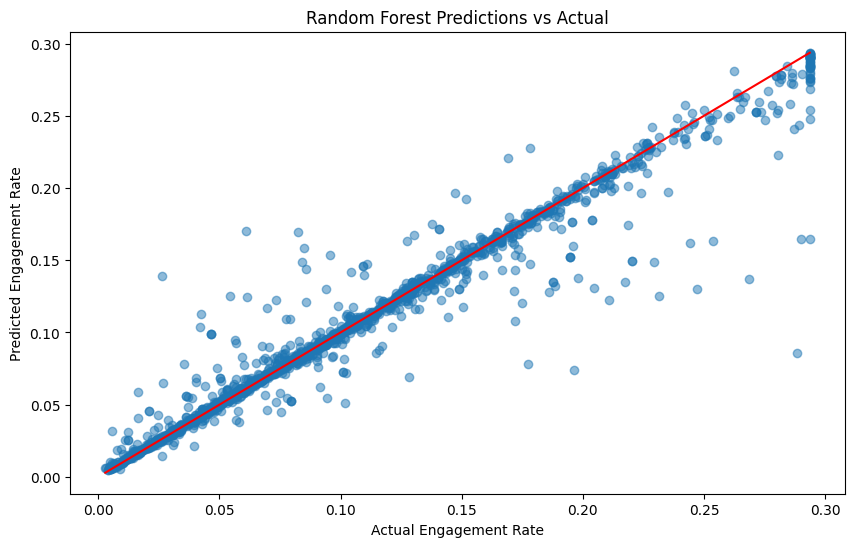

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Random Forest Predictions vs Actual')
plt.show()

In [101]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Classification Modeling for Engagement_Class

In [157]:
# Define thresholds for classification
low_threshold = tiktokpost_data_cleaned['engagement_rate'].quantile(0.25)
high_threshold = tiktokpost_data_cleaned['engagement_rate'].quantile(0.75)

# Classify posts
def classify_engagement(row):
    if row['engagement_rate'] <= low_threshold:
        return 'Low Engagement'
    elif row['engagement_rate'] >= high_threshold:
        return 'High Engagement'
    else:
        return 'Medium Engagement'

tiktokpost_data_cleaned['engagement_classification'] = tiktokpost_data_cleaned.apply(classify_engagement, axis=1)

In [158]:
tiktokpost_data_cleaned['engagement_classification'].dtypes

dtype('O')

In [175]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Target variable
y_clf = tiktokpost_data_cleaned['engagement_classification']

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(y_clf)

# Features DataFrame
features = ['play_count', 'num_hashtags', 'total_engagements', 'is_verified', 'video_duration']
X = tiktokpost_data_cleaned[features]

# Convert categorical features to numeric if necessary
if X['is_verified'].dtype == 'O':  # If 'is_verified' is of object type
    X['is_verified'] = LabelEncoder().fit_transform(X['is_verified'])

In [176]:
# Split the data

X_train, X_test, y_train_, y_test_ = train_test_split(X, target_encoded, test_size=0.2, random_state=42)

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**It's time to build a machine learning model.**

**We'll train it (find the patterns) on the training set.**

**And we'll test it (use the patterns) on the test set.**

We're going to try 5 different machine learning models:

**Logistic Regression**

In [178]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train_)

print_score(lr_clf, X_train, y_train_, X_test, y_test_, train=True)
print_score(lr_clf, X_train, y_train_, X_test, y_test_, train=False)

Train Result:
Accuracy Score: 50.22%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1            2  accuracy    macro avg  \
precision     0.660000     0.500000     0.501095   0.50217     0.553698   
recall        0.017867     0.003802     0.994028   0.50217     0.338566   
f1-score      0.034792     0.007547     0.666303   0.50217     0.236214   
support    1847.000000  1841.000000  3684.000000   0.50217  7372.000000   

           weighted avg  
precision      0.540634  
recall         0.502170  
f1-score       0.343572  
support     7372.000000  
_______________________________________________
Confusion Matrix: 
 [[  33    1 1813]
 [   1    7 1833]
 [  16    6 3662]]

Test Result:
Accuracy Score: 50.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy    macro avg  \
precision    0.666667    0.444444    0.502468  0.503254     0.537860   
recall     

In [179]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

clf_results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
clf_results_df

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

**Support Vector Machines (SVM)**

In [109]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 50.01%
_______________________________________________
CLASSIFICATION REPORT:
                     0       1            2  accuracy    macro avg  \
precision     1.000000     0.0     0.499932  0.500136     0.499977   
recall        0.001624     0.0     1.000000  0.500136     0.333875   
f1-score      0.003243     0.0     0.666606  0.500136     0.223283   
support    1847.000000  1841.0  3684.000000  0.500136  7372.000000   

           weighted avg  
precision      0.500373  
recall         0.500136  
f1-score       0.333935  
support     7372.000000  
_______________________________________________
Confusion Matrix: 
 [[   3    0 1844]
 [   0    0 1841]
 [   0    0 3684]]

Test Result:
Accuracy Score: 50.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1           2  accuracy    macro avg  weighted avg
precision    0.0    0.0    0.500542  0.500542     0.166847      0.250543
recall       0.0    0.0    1.00000

In [110]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

clf_results_df1 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

clf_results_df= pd.concat([clf_results_df, clf_results_df1], ignore_index=True)
clf_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,50.217037,50.32538
1,Support Vector Machine,50.013565,50.05423


**K-Nearest Neighbors (KNN)**

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 71.35%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1            2  accuracy    macro avg  \
precision     0.649149     0.697719     0.753952  0.713511     0.700273   
recall        0.702220     0.598045     0.776873  0.713511     0.692379   
f1-score      0.674642     0.644048     0.765241  0.713511     0.694644   
support    1847.000000  1841.000000  3684.000000  0.713511  7372.000000   

           weighted avg  
precision      0.713651  
recall         0.713511  
f1-score       0.712277  
support     7372.000000  
_______________________________________________
Confusion Matrix: 
 [[1297  120  430]
 [ 236 1101  504]
 [ 465  357 2862]]

Test Result:
Accuracy Score: 54.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy    macro avg  \
precision    0.486141    0.482412    0.607984  0.549892     0.525512   
recall     

In [112]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

clf_results_df1 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],

                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
clf_results_df= pd.concat([clf_results_df, clf_results_df1], ignore_index=True)
clf_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,50.217037,50.325380
1,Support Vector Machine,50.013565,50.054230
2,K-nearest neighbors,71.351058,54.989154


**Random Forest**

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train_)

print_score(rf_clf, X_train, y_train_, X_test, y_test_, train=True)
print_score(rf_clf, X_train, y_train_, X_test, y_test_, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1       2  accuracy  macro avg  weighted avg
precision     1.0     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0     1.0       1.0        1.0           1.0
support    1847.0  1841.0  3684.0       1.0     7372.0        7372.0
_______________________________________________
Confusion Matrix: 
 [[1847    0    0]
 [   0 1841    0]
 [   0    0 3684]]

Test Result:
Accuracy Score: 93.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy    macro avg  \
precision    0.953596    0.957303    0.914256  0.933839     0.941719   
recall       0.897380    0.920086    0.958830  0.933839     0.925432   
f1-score     0.924634    0.938326    0.936013  0.933839     0.932991   
support    458.000000  463.

In [114]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

clf_results_df1 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

clf_results_df= pd.concat([clf_results_df, clf_results_df1], ignore_index=True)
clf_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,50.217037,50.325380
1,Support Vector Machine,50.013565,50.054230
2,K-nearest neighbors,71.351058,54.989154
3,Random Forest Classifier,100.000000,93.383948


**Gradient Boost**

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
gb_clf.fit(X_train, y_train)

# Assuming print_score is a custom function, replace rf_clf with gb_clf
print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 99.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1            2  accuracy    macro avg  \
precision     1.000000     0.999455     0.996752  0.998237     0.998736   
recall        0.996751     0.996741     0.999729  0.998237     0.997740   
f1-score      0.998373     0.998096     0.998238  0.998237     0.998236   
support    1847.000000  1841.000000  3684.000000  0.998237  7372.000000   

           weighted avg  
precision      0.998241  
recall         0.998237  
f1-score       0.998237  
support     7372.000000  
_______________________________________________
Confusion Matrix: 
 [[1841    0    6]
 [   0 1835    6]
 [   0    1 3683]]

Test Result:
Accuracy Score: 93.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy    macro avg  \
precision    0.939597    0.959551    0.925420  0.937093     0.941523   
recall     

In [116]:
from sklearn.metrics import accuracy_score

# Calculate training and testing accuracy scores for GradientBoostingClassifier
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

# Create a DataFrame to store the results
clf_results_df1 = pd.DataFrame(data=[["Gradient Boosting Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

clf_results_df= pd.concat([clf_results_df, clf_results_df1], ignore_index=True)
clf_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,50.217037,50.325380
1,Support Vector Machine,50.013565,50.054230
2,K-nearest neighbors,71.351058,54.989154
3,Random Forest Classifier,100.000000,93.383948
4,Gradient Boosting Classifier,99.823657,93.709328


# 🤖 Models Hyperparameter Tuning

## Random Forest Classifier Hyperparameter Tuning

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(100, 1000),         # Number of trees in the forest
    'max_depth': randint(10, 50),               # Maximum depth of the trees
    'min_samples_split': randint(2, 10),        # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4),          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

# Create a RandomForestClassifier model
rf_clf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_clf,
                                   param_distributions=param_distributions,
                                   n_iter=100,            # Number of random combinations to try
                                   cv=3,                  # 3-fold cross-validation
                                   n_jobs=-1,             # Use all available cores
                                   random_state=42,       # For reproducibility
                                   verbose=2,             # Print progress
                                   scoring='accuracy')    # Evaluation metric

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_rf_clf = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate the best model
print_score(best_rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(best_rf_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 674}
Train Result:
Accuracy Score: 99.92%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1            2  accuracy    macro avg  \
precision     0.998378     0.999456     0.999457  0.999186     0.999097   
recall        1.000000     0.997827     0.999457  0.999186     0.999095   
f1-score      0.999189     0.998641     0.999457  0.999186     0.999096   
support    1847.000000  1841.000000  3684.000000  0.999186  7372.000000   

           weighted avg  
precision      0.999187  
recall         0.999186  
f1-score       0.999186  
support     7372.000000  
_______________________________________________
Confusion Matrix: 
 [[1847    0    0]
 [   2 1837    2]
 [   1    1 3682]]

Test Result:
Accuracy Score: 93.60%
__________

**Cross Validation**

In [170]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with error_score set to 'raise' for debugging
cv_scores = cross_val_score(best_rf_clf, X, y, cv=5, scoring='accuracy', verbose=2, error_score='raise')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print(f"Average Cross-Validation Score: {average_cv_score:.4f}")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## **Model Evaluation**

**Training Accuracy:**

Random Forest Classifier: 100%
This indicates the model is fitting the training data perfectly. However, be cautious as this could indicate overfitting if the model performs much worse on unseen data.

**Testing Accuracy:**

Random Forest Classifier: 93.38%
This is a strong performance on the test set, suggesting that the model generalizes well to new data.

**Classification Report:**

- **Training Data:**
Precision, Recall, and F1-Score are very high across all classes, indicating that the model is performing exceptionally well on the training data.

- **Test Data:**
Precision and recall are also high, though slightly lower than on the training data. This is expected and indicates good generalization.

**Confusion Matrix:**

- **Training Data:**
The confusion matrix shows very few misclassifications, with most predictions correctly classified.

- **Test Data:**
The matrix shows some misclassifications, but overall, the model is performing well with a high number of correct predictions.

**Cross-Validation Scores:**
The cross-validation scores are consistent and high, with an average score of approximately 92.34%. This suggests that the model performs reliably across different subsets of the data.

In [ ]:
# Feature importance for Random Forest
importances = best_rf_clf.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Engagement', 'Medium Engagement', 'High Engagement'], yticklabels=['Low Engagement', 'Medium Engagement', 'High Engagement'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**Deployment using gradio**

In [124]:
#Deployment

!pip install gradio
!pip install gradio=3.43.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [125]:
!pip install gradio==3.43.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.2.0
    Uninstalling gradio_client-1.2.0:
      Successfully uninstalled gradio_client-1.2.0
  Attempting uninstall: gradio
    Found existing installation: gradio 4.40.0
    Uninstalling gradio-4.40.0:
      Successfully uninstalled gradio-4.40.0


In [174]:
tiktokpost_data_cleaned.describe()

,create_ time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,is_verified,total_engagements,engagement_rate,num_hashtags,hashtag_artist,hashtag_art,hashtag_foryourpage,hashtag_foryou,hashtag_fypviral,hashtag_foryoupage,hashtag_fyp,hashtag_viral,hashtag_trending,hashtag_tiktok,hashtag_capcut,hashtag_viraltiktok,hashtag_music,hashtag_tiktokmalaysia,hashtag_trend,hashtag_tiktokartist,hashtag_painting,num_popular_hashtags,num_hashtags_play_count,likes_popular_hashtags,video_length_popular_hashtags
count,9216,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.00000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,2023-06-02 15:18:26.250000128,0.253217,0.009212,0.013411,0.259922,0.253291,0.057207,0.043294,0.011617,0.102846,0.030254,0.061849,0.064779,0.120334,0.208225,0.057943,0.133898,0.426758,0.196181,0.055881,0.052300,0.043077,0.018012,0.011502,0.025065,0.027886,0.00293,0.012912,5.106771,0.034662,0.034706,0.020819
min,2018-10-10 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-10-02 00:00:00,0.001293,0.000013,0.000020,0.004458,0.001635,0.018838,0.000000,0.000026,0.045997,0.011673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2023-10-21 00:00:00,0.023417,0.000272,0.000562,0.042963,0.033967,0.029827,0.000000,0.000488,0.085978,0.023346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000159,0.000131,0.007308
75%,2024-05-18 00:00:00,0.400776,0.003666,0.008993,0.402675,0.400981,0.069074,0.000000,0.008096,0.145065,0.035019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,0.017819,0.014911,0.022308
max,2024-07-22 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.293667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,257.000000,1.000000,1.000000,1.000000
std,NaN,0.369322,0.040352,0.040778,0.368333,0.362629,0.074665,0.203530,0.035215,0.071945,0.042382,0.240894,0.246148,0.325370,0.406061,0.233648,0.340561,0.494633,0.397128,0.229704,0.222644,0.203042,0.133002,0.106633,0.156331,0.164656,0.05405,0.112903,7.706125,0.084171,0.084741,0.050377


In [181]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report

features = ['play_count', 'num_hashtags', 'total_engagements', 'is_verified', 'video_duration']

X = tiktokpost_data_cleaned[features]
y_rg = tiktokpost_data_cleaned['engagement_rate']
y_clf = tiktokpost_data_cleaned['engagement_classification']

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(y_clf)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_rg, test_size=0.2, random_state=42)
X_train, X_test, y_train_, y_test_ = train_test_split(X, target_encoded, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestRegressor(bootstrap=False, max_depth=44, max_features='log2', min_samples_leaf=1, min_samples_split=4, n_estimators=872, random_state=42)
rf_model.fit(X_train, y_train)

rf_clf = RandomForestClassifier(bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, n_estimators=674, random_state=42)
rf_clf.fit(X_train, y_train_)

# Define your categorical mapping and comments
class_mapping = {0: "Low Engagement", 1: "Medium Engagement", 2: "High Engagement"}
comments_mapping = {
    "Low Engagement": "Oh no, your engagement is low. You can try the following methods to boost your engagement:\n1. Use trending hashtags.\n2. Post during peak times.\n3. Interact with your audience.",
    "Medium Engagement": "Your engagement is average. Keep experimenting with different content styles and engage more with your audience!",
    "High Engagement": "Wow, great job! Keep up the good work and continue posting high-quality content!"
}

# Define the updated prediction function with debugging information
def predict_all(play_count, num_hashtags, total_engagements, is_verified, video_duration):
    try:
        # Prepare input data
        input_data = pd.DataFrame([[play_count, num_hashtags, total_engagements, is_verified, video_duration]], columns=features)

        # Predict with regression model
        reg_prediction = rf_model.predict(input_data)

        # Predict with classification model
        clf_prediction_num = rf_clf.predict(input_data)[0]

        # Map numeric prediction to label
        clf_prediction_label = class_mapping[clf_prediction_num]

        # Get the corresponding comment
        comment = comments_mapping[clf_prediction_label]

        # Format the output with HTML for styling
        classification_output = f"<b>Classification Prediction:</b> {clf_prediction_label}<br><br>{comment}"
        regression_output = f"<b>Regression Prediction:</b> {reg_prediction[0]:.2f}"

        return regression_output, classification_output

    except Exception as e:
        return f"Error occurred: {str(e)}", "N/A"

# Create Gradio interface for both models
interface = gr.Interface(
    fn=predict_all,
    inputs=[
        gr.Slider(0, 1, label="View Count", info= "Choose between 0 and 1"),
        gr.Slider(0, 1, label="Number of Hashtags Used"),
        gr.Slider(0, 1, label="Total Engagements (Like+Share+Saved+Comment)"),
        gr.Dropdown(tiktokpost_data_cleaned['is_verified'].unique().tolist(), label="Is Verified (0: No or 1:Yes)"),
        gr.Slider(0, 1, label="Video Duration (s)")
    ],
    outputs=[
        gr.HTML(label="Regression Prediction"),
        gr.HTML(label="Classification Prediction and Comment")
    ],
    title="<h1 style='color:#4CAF50;'>TikTok Engagement Predictor</h1>",
    description="<div style='font-size:18px;'>This tool predicts the engagement level of a TikTok post based on various features. Use it to get both a <b>numerical prediction</b> (regression) and a <b>categorical classification</b> (low, medium, high engagement) along with personalized advice.</div>"
)

# Launch the interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.43.1, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://380886dd2b87fd36a7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
